<a id='top'></a>

# StatsBomb EURO 2020 Data Analysis
##### Notebook to analyse engineered [StatsBomb](https://statsbomb.com/) Event and OBV data, downloaded from the [Open Data GitHub repository](https://github.com/statsbomb/open-data), as part of the [StatsBomb Pro Services Analyst](https://statsbomb.bamboohr.com/jobs/view.php?id=84&source=aWQ9MjA%3D) Technical Assignment.

### By [Edd Webster](https://www.twitter.com/eddwebster)
Notebook first written: 10/01/2022<br>
Notebook last updated: 17/01/2022

![StatsBomb](../img/logos/stats-bomb-logo_small.png)

![EURO 2020](../img/competitions/uefa_euro_2020_small.png)
<br>

See [Section 4](#section4) to jump straight into the short analytical piece and skip the [Task Brief](#section2) and [Data Sources](#section3) sections.

___

<a id='introduction'></a>

## <a id='introduction'>Introduction</a>
This notebook analyses [StatsBomb](https://statsbomb.com/) Event and OBV data, downloaded from the [Open Data GitHub repository](https://github.com/statsbomb/open-data), as part of the [StatsBomb Pro Services Analyst](https://statsbomb.bamboohr.com/jobs/view.php?id=84&source=aWQ9MjA%3D) Technical Assignment.

This notebook uses [pandas](http://pandas.pydata.org/) for data manipulation through DataFrames and [matplotlib](https://matplotlib.org/contents.html?v=20200411155018) for data visualisation.

For more information about this notebook and the author, I am available through all the following channels:
*    [eddwebster.com](https://www.eddwebster.com/);
*    edd.j.webster@gmail.com;
*    [@eddwebster](https://www.twitter.com/eddwebster);
*    [linkedin.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/);
*    [github/eddwebster](https://github.com/eddwebster/); and
*    [public.tableau.com/profile/edd.webster](https://public.tableau.com/profile/edd.webster).

A static version of this notebook can be found [here](https://nbviewer.org/github/eddwebster/statsbomb/blob/main/notebooks/StatsBomb%20EURO%202020%20Data%20Analysis.ipynb). This notebook has an accompanying [`statsbomb`](https://github.com/eddwebster/statsbomb) GitHub repository and for my full repository of football analysis, see my [`football_analysis`](https://github.com/eddwebster/football_analytics) GitHub repository. For the custom functions used to create the visualisations that feature in this notebook, see the [`WebsterViz.py`](https://github.com/eddwebster/statsbomb/blob/main/scripts/WebsterViz.py) script.

___

## <a id='notebook_contents'>Notebook Contents</a>
1.    [Notebook Dependencies](#section1)<br>
2.    [About this Notebook](#section2)<br>
      1.    [Assignment Brief](#section2.1)<br>
      2.    [Topic of Analysis Selected](#section2.2)<br>
      3.    [Notebook Conventions](#section2.3)<br>
3.    [Data Sources](#section3)<br>
      1.    [Introduction](#section3.1)<br>
      2.    [Import Engineered Dataset](#section3.2)<br>
      3.    [Initial Data Handling](#section3.3)<br>
4.    [Analytical Summary - ‘England at EURO 2020: How Good Were They Actually?’](#section4)<br>
      1.    [Group Stages - Croatia, Scotland, and Czech Republic](#section4.1)<br>
      2.    [Last Sixteen - Germany](#section4.2)<br>
      3.    [Quarter Finals - Ukraine](#section4.3)<br>
      4.    [Semi Finals - Denmark](#section4.4)<br>
      5.    [The Final - Italy](#section4.5)<br>
      6.    [Conclusions](#section4.6)<br>  
5.    [Summary](#section6)<br>
6.    [References](#section7)

___

<a id='section1'></a>

## <a id='#section1'>1. Notebook Dependencies</a>

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [`Jupyter notebooks`](https://jupyter.org/) for this notebook environment with which this project is presented;
*    [`NumPy`](http://www.numpy.org/) for multidimensional array computing;
*    [`pandas`](http://pandas.pydata.org/) for data analysis and manipulation;
*    [`matplotlib`](https://matplotlib.org/contents.html?v=20200411155018) and [`Seaborn`](https://seaborn.pydata.org/) for data visualisations; and
*    [`WebsterViz.py`](https://github.com/eddwebster/statsbomb/blob/main/scripts/WebsterViz.py) script containing the custom functions used to create the visualisations from [`matplotlib`](https://matplotlib.org/contents.html?v=20200411155018), that feature in this notebook. The functions in this script have be designed to read Event data, with no data engineering required beforehand. These steps are all taken care of within the function. This script of functions can be divided into the following subsections
     1.    Function to draw a pitch - `draw_pitch()`
     2.    Functions to draw shot maps - `create_shot_map_team()`, `create_shot_map_player()`
     3.    Function to draw an xG race chart - `create_xg_race_chart()`
     4.    Functions to create OBV charts - `create_obv_teams_bar_chart()`, `create_obv_players_bar_chart()`
     5.    Functions to create Expected Goals plots - `create_xg_diff_bar_chart()`, `create_xg_bar_chart()`, `create_xg_bar_chart_player()`, `create_xga_bar_chart()`, `create_xg_diff_scatter_plot()`
     6.    Functions to create Passing Networks - `create_passing_network()`
     7.    Functions to create Passing Maps - `create_pass_map_team()`, `create_pass_map_single_player()`, `create_pass_map_multiple_players()`
     8.    Functions to create Heat Maps - `create_heat_map_team()`, `create_heat_map_player()`
     9.    Functions to create combined Heat and Pass Maps - `create_heat_and_pass_map_team()`, `create_heat_and_pass_map_player()`
     10. Functions to create OBV Maps - `create_obv_carries_player()` and `create_obv_passes_player()`


All packages used for this notebook can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

### Import Libraries and Modules

In [1]:
# Python ≥3.5 (ideally)
import platform
import sys, getopt
assert sys.version_info >= (3, 5)
import csv

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np
from math import pi

# Datetime
import datetime
from datetime import date
import time

# Data Preprocessing
import pandas as pd
import os
import re
import chardet
import random
from io import BytesIO
from pathlib import Path

# Reading Directories
import glob
import os

# Working with JSON
import json
from pandas import json_normalize

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib.patches import Arc
from matplotlib.colors import ListedColormap
import matplotlib.image as image
import matplotlib.gridspec as gridspec 
import matplotlib.patheffects as path_effects
import seaborn as sns
from PIL import Image
from highlight_text import htext
import missingno as msno
from mplsoccer.pitch import Pitch

# Requests and downloads
import tqdm
import requests

# Display in Jupyter
from IPython.display import Image, Video, YouTubeVideo
from IPython.core.display import HTML

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Print message
print("Setup Complete")

Setup Complete


In [2]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))

Python: 3.7.6
NumPy: 1.20.3
pandas: 1.3.2
matplotlib: 3.4.2


### Defined Filepaths

In [3]:
# Set up initial paths to subfolders
base_dir = os.path.join('..')
data_dir = os.path.join(base_dir, 'data')
img_dir = os.path.join(base_dir, 'img')
fig_dir = os.path.join(base_dir, 'img', 'fig')
video_dir = os.path.join(base_dir, 'video')
scripts_dir = os.path.join(base_dir, 'scripts')

### Import Custom Libraries

In [4]:
# Import the customer WebsterViz library, created to visualise StatsBomb Event data.

## Define the filepath of scripts
sys.path.insert(0, os.path.abspath(scripts_dir))

## Custom script to visualise StatsBomb Event data, created by Edd Webster for this analytical assignment
import WebsterViz as wviz

### Create Directory Structure

In [5]:
# Make the directory structure
for folder in ['combined', 'competitions', 'events', 'tactics', 'lineups', 'three-sixty']:
    path = os.path.join(data_dir, 'raw', folder)
    if not os.path.exists(path):
        os.mkdir(path)

### Notebook Settings

In [6]:
# Display all columns of displayed pandas DataFrames
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

---

<a id='section2'></a>

## <a id='#section2'>2. About this Notebook</a>

<a id='section2.1'></a>

### <a id='#section2.1'>2.1. Assignment Brief</a>
The following is copy and pasted from the original brief emailed.

> ##### Intro
> For this task, we want you to show us how you approach analysing and visualising data - more specifically StatsBomb's football data.
> 
> This task is very open ended and we want to see your creativity. Select a player(s) or team(s) and a topic of your choice and write a short analysis piece (~500 words) inlcuding some data visualisations.
> 
> You may use any of the open data on StatsBomb's Github page linked at the bottom. This includes the Euros dataset which has 360 data. We have also provided OBV values for the events in that Euros dataset which you can find in a seperate csv file.
> 
> ##### Deliverables
> Please submit your report and any code you write for this to scott.johnson@statsbomb.com please also cc james@statsbomb.com and chris.galley@statsbomb.com in the email.
> 
> The code can be submitted in any format you prefer (Jupyter Notebook, R Markdown, Script, etc.)
> 
> Ideally the final work will conform to a general StatsBomb theme. We are interested in clarity of visualisation, general analysis skill, football perception, and the ability to turn an idea into a piece of work.
> 
> Please don't spend lots of time on this task. We also expect you to run out of time before you're completely happy, so don't panic! We care much more about seeing how you think and work on analysing football, and how you write code for other people's consumption, than we do about you necessarily finishing the task and delivering useful results.
> 
> Please submit your test by Monday 17th January.



<a id='section2.2'></a>

### <a id='#section2.2'>2.2. Topic of Analysis Selected</a>
<br>
<center>
    
## England at EURO 2020: How Good Were They Actually?
    
</center>
<br>
<center>A data-driven analysis of the England Men’s Football Team throughout the duration of EURO 2020</center>

![England Football Team](../img/england-football-players.jpeg)

**After a dramatic evening at Wembley stadium, concluding in a tense and heart-breaking penalty shoot-out for supporters of the Three Lions, Italy were crowned the champions of EURO 2020. Football did not come home, instead it went to Rome.**

Following on from a what was considered successful 2018 FIFA Men’s World Cup campaign, Gareth Southgate’s England reached the final of the EURO 2020 Men’s tournament, ended their 55-year wait of reaching a major final since their 1966 World Cup triumph. The England team were largely praised for their performances, with the general consensus being that they had exceeded expectations, an opinion supported by Southgate’s awarding of the Coach of the Year award at the 2021 BBC Sports Personality of the Year [[link](https://www.bbc.co.uk/sport/sports-personality/59681685)]. However, despite falling at the final hurdle, does the data support the argument that England were at best, the second-best team at the tournament? Were England hard done by, by not going all the way and [“bringing football home”](https://www.youtube.com/watch?v=RJqimlFcJsM)? Or was their final standing in fact an overachievement?

This analytical piece looks back on England’s deep run in the tournament, aiming to distinguish fact from opinion, through data-driven analysis of each of England’s seven performances. This data-driven analysis is possible through the application of StatsBomb’s best-in-class Event data. This data has also been further enriched with a separate dataset of On-Ball Values, which are the output of a model that assigns a value to each action that takes place on the football pitch based on the positive (or negative) impact the action has on the team's likelihood of scoring (and conceding) [[link](https://statsbomb.com/2021/09/introducing-on-ball-value-obv/)].

See [Section 4](#section4) to jump straight into the short analytical piece.

<a id='section2.3'></a>

### <a id='#section2.3'>2.3. Notebook Conventions</a>
*    Variables that refer a `DataFrame` object are prefixed with `df_`.
*    Variables that refer to a collection of `DataFrame` objects (e.g., a list, a set or a dict) are prefixed with `dfs_`.

---

<a id='section3'></a>

## <a id='#section3'>3. Data Sources</a>

<a id='section3.1'></a>

### <a id='#section3.1'>3.1. Introduction</a>
[StatsBomb](https://statsbomb.com/) are a  football analytics, data provider, and data visualisation and analytics tool company, founded by [Ted Knutson](https://twitter.com/mixedknuts). StatsBomb have brought common data analytics practices seen in business and tech to the world of football analytics. Through their platforms and products, StatsBomb offer immediate accessibility to valuable football insights from all major leagues and players across the globe.

![StatsBomb](../img/logos/stats-bomb-logo_small.png)

<a id='section3.2'></a>

### <a id='#section3.2'>3.2. Import Engineered Dataset</a>
The [`StatsBomb 360 Data Engineering`](https://github.com/eddwebster/statsbomb/blob/main/notebooks/StatsBomb%20360%20Data%20Engineering.ipynb) notebook that I have written, engineers the StatsBomb Event, Matches, 360, and OBV data, into form that is ready for analysis. This notebook can be found in the [`notebooks`](https://github.com/eddwebster/statsbomb/tree/main/notebooks) subfolder of my [`statsbomb`](https://github.com/eddwebster/statsbomb) GitHub repository.

This notebook uses the [pandas](http://pandas.pydata.org/) library to import our data to this workbook as a DataFrame.

In [7]:
# Import engineered CSV file as a pandas DataFrame
df_events = pd.read_csv(os.path.join(data_dir, 'engineered', 'combined', 'euro2020', 'combined_euro_2020_360.csv'))

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (17,44,68,77,78,79,81,82,83,88,89,91,92,97,99,100,101,107,108,111,112,113,115,118,119,120,121,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<a id='section3.3'></a>

### <a id='#section3.3'>3.3. Initial Data Handling</a>

First check the quality of the dataset by looking first and last rows in pandas using the [`head()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [`tail()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [8]:
# Display the first five rows of the DataFrame, df_events
df_events.head()

id  index  period     timestamp  minute  \
0  9427b18a-6b10-411f-90da-3d6240b80c71      1       1  00:00:00.000       0   
1  542c58bf-5c6c-43ca-9d8d-e086c7f08aaf      2       1  00:00:00.000       0   
2  a0dfe8a0-a0b9-443e-89e3-a8ba6596fa33      3       1  00:00:00.000       0   
3  c7156352-f4b7-4140-aa51-6e26fd019a11      4       1  00:00:00.000       0   
4  94dbc5c3-ef37-445e-9154-3d9f9ea9245d      5       1  00:00:00.490       0   

   second  possession  duration  type_id    type_name  possession_team_id  \
0       0           1  0.000000       35  Starting XI                1835   
1       0           1  0.000000       35  Starting XI                1835   
2       0           1  0.000000       18   Half Start                1835   
3       0           1  0.000000       18   Half Start                1835   
4       0           2  1.373215       30         Pass                 796   

  possession_team_name  play_pattern_id play_pattern_name  team_id team_name  \
0              Finland                1      Regular Play     1835   Finland   
1              Finland                1      Regular Play      796    Russia   
2              Finland                1      Regular Play     1835   Finland   
3              Finland                1      Regular Play      796    Russia   
4               Russia                9     From Kick Off      796    Russia   

   tactics_formation                                     tactics_lineup  \
0              352.0  [{'player': {'id': 8667, 'name': 'Lukáš Hrádec...   
1             3421.0  [{'player': {'id': 21298, 'name': 'Matvey Safo...   
2                NaN                                                NaN   
3                NaN                                                NaN   
4                NaN                                                NaN   

                             related_events    location  player_id  \
0                                       NaN         NaN        NaN   
1                                       NaN         NaN        NaN   
2  ['c7156352-f4b7-4140-aa51-6e26fd019a11']         NaN        NaN   
3  ['a0dfe8a0-a0b9-443e-89e3-a8ba6596fa33']         NaN        NaN   
4  ['c0935bbe-3eb4-4a21-9eee-45f380d1f26d']  60.0, 40.0     6299.0   

         player_name  position_id             position_name  \
0                NaN          NaN                       NaN   
1                NaN          NaN                       NaN   
2                NaN          NaN                       NaN   
3                NaN          NaN                       NaN   
4  Aleksey Miranchuk         18.0  Right Attacking Midfield   

   pass_recipient_id pass_recipient_name  pass_length  pass_angle  \
0                NaN                 NaN          NaN         NaN   
1                NaN                 NaN          NaN         NaN   
2                NaN                 NaN          NaN         NaN   
3                NaN                 NaN          NaN         NaN   
4            31917.0         Igor Diveev    22.357325    3.069967   

   pass_height_id pass_height_name pass_end_location  pass_body_part_id  \
0             NaN              NaN               NaN                NaN   
1             NaN              NaN               NaN                NaN   
2             NaN              NaN               NaN                NaN   
3             NaN              NaN               NaN                NaN   
4             1.0      Ground Pass        37.7, 41.6               38.0   

  pass_body_part_name  pass_type_id pass_type_name carry_end_location  \
0                 NaN           NaN            NaN                NaN   
1                 NaN           NaN            NaN                NaN   
2                 NaN           NaN            NaN                NaN   
3                 NaN           NaN            NaN                NaN   
4           Left Foot          65.0       Kick Off                NaN   

  under_pressure  duel_type_id duel_type_name pass_aeria

In [9]:
# Display the last five rows of the DataFrame, df_events
df_events.tail()

id  index  period     timestamp  \
192681  8aa68a18-79d2-4b8b-ba5f-9d3124f1cd20   2993       2  00:50:23.150   
192682  a0bdd045-65d0-4601-9378-a5dacdba3257   2994       2  00:50:24.021   
192683  dcbfc5e1-b22f-460f-8132-cf6fe7a590f8   2995       2  00:50:24.021   
192684  97cb188e-82e3-49cb-9ccf-9a5346f042b1   2996       2  00:50:25.404   
192685  edfa93d5-a744-41a4-a10d-f1d09017011d   2997       2  00:50:25.404   

        minute  second  possession  duration  type_id      type_name  \
192681      95      23         151   0.87093       30           Pass   
192682      95      24         151       NaN       42  Ball Receipt*   
192683      95      24         151   0.00000       10   Interception   
192684      95      25         151   0.00000       34       Half End   
192685      95      25         151   0.00000       34       Half End   

        possession_team_id possession_team_name  play_pattern_id  \
192681                 907                Wales                4   
192682                 907                Wales                4   
192683                 907                Wales                4   
192684                 907                Wales                4   
192685                 907                Wales                4   

       play_pattern_name  team_id    team_name  tactics_formation  \
192681     From Throw In      907        Wales                NaN   
192682     From Throw In      907        Wales                NaN   
192683     From Throw In      773  Switzerland                NaN   
192684     From Throw In      773  Switzerland                NaN   
192685     From Throw In      907        Wales                NaN   

       tactics_lineup                                     related_events  \
192681            NaN  ['a0bdd045-65d0-4601-9378-a5dacdba3257', 'dcbf...   
192682            NaN           ['8aa68a18-79d2-4b8b-ba5f-9d3124f1cd20']   
192683            NaN           ['8aa68a18-79d2-4b8b-ba5f-9d3124f1cd20']   
192684            NaN           ['edfa93d5-a744-41a4-a10d-f1d09017011d']   
192685            NaN           ['97cb188e-82e3-49cb-9ccf-9a5346f042b1']   

          location  player_id        player_name  position_id  \
192681  110.7, 0.1     3086.0         Ben Davies          6.0   
192682  113.7, 8.0     6399.0  Gareth Frank Bale         16.0   
192683   7.5, 74.2     8814.0        Nico Elvedi          3.0   
192684         NaN        NaN                NaN          NaN   
192685         NaN        NaN                NaN          NaN   

            position_name  pass_recipient_id pass_recipient_name  pass_length  \
192681          Left Back             6399.0   Gareth Frank Bale     6.103278   
192682      Left Midfield                NaN                 NaN          NaN   
192683  Right Center Back                NaN                 NaN          NaN   
192684                NaN                NaN                 NaN          NaN   
192685                NaN                NaN                 NaN          NaN   

        pass_angle  pass_height_id pass_height_name pass_end_location  \
192681    1.254227             2.0         Low Pass        112.6, 5.9   
192682         NaN             NaN              NaN               NaN   
192683         NaN             NaN              NaN               NaN   
192684         NaN             NaN              NaN               NaN   
192685         NaN             NaN              NaN               NaN   

        pass_body_part_id pass_body_part_name  pass_type_id pass_type_name  \
192681                NaN                 NaN          67.0       Throw-in   
192682                NaN                 NaN           NaN            NaN   
192683                NaN                 NaN           NaN            NaN   
192684                NaN                 NaN           NaN            NaN   
192685                NaN                 NaN           NaN            NaN   

       carry_end_location under_pressure  duel_type_id duel_type_name  \
192681

In [10]:
# Print the shape of the DataFrame, df_events
print(df_events.shape)

(192686, 174)


In [11]:
# Print the column names of the DataFrame, df_events
print(df_events.columns)

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'type_id', 'type_name',
       ...
       'next_event', 'previous_event', 'next_team_possession',
       'previous_team_possession', 'possession_retained', 'endloc_x',
       'endloc_y', 'dist1', 'dist2', 'diffdist'],
      dtype='object', length=174)


In [12]:
# Displays all columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_events.dtypes)

id                                   object
index                                 int64
period                                int64
timestamp                            object
minute                                int64
second                                int64
possession                            int64
duration                            float64
type_id                               int64
type_name                            object
possession_team_id                    int64
possession_team_name                 object
play_pattern_id                       int64
play_pattern_name                    object
team_id                               int64
team_name                            object
tactics_formation                   float64
tactics_lineup                       object
related_events                       object
location                             object
player_id                           float64
player_name                          object
position_id                     

In [13]:
# Print statements about the dataset

## Define variables for print statments
count_matches = df_events['match_id'].nunique() 
count_events = len(df_events)
count_shots = len(df_events[(df_events['type_name'] == 'Shot')])
count_goals = len(df_events[(df_events['type_name'] == 'Shot') & (df_events['shot_outcome_name'] == 'Goal')])
cols = list(df_events)
count_event_type = len(df_events['type_name'].unique())
vals_event_type = df_events['type_name'].unique()

## Print statements
print(f'The EURO 2020 Events DataFrame contains the data for {count_matches:,} matches, of which there are {count_events:,} total events.\n')
print(f'Of these events, there are {count_shots:,} shots ({round(100*count_shots/count_events,1)}%) and {count_goals:,} goals ({round(100*count_goals/count_events,1)}%).\n')
print(f'This translates to a shot to goal conversion percentage of {round(100*count_goals/count_shots, 1)}%.\n')
print(f'The dataset contains the following features: {cols}\n')
print(f'The \'event_type\' column contain {count_event_type:,} different values, including the following: {vals_event_type}\n')    

The EURO 2020 Events DataFrame contains the data for 51 matches, of which there are 192,686 total events.

Of these events, there are 1,289 shots (0.7%) and 155 goals (0.1%).

This translates to a shot to goal conversion percentage of 12.0%.

The dataset contains the following features: ['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession', 'duration', 'type_id', 'type_name', 'possession_team_id', 'possession_team_name', 'play_pattern_id', 'play_pattern_name', 'team_id', 'team_name', 'tactics_formation', 'tactics_lineup', 'related_events', 'location', 'player_id', 'player_name', 'position_id', 'position_name', 'pass_recipient_id', 'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id', 'pass_height_name', 'pass_end_location', 'pass_body_part_id', 'pass_body_part_name', 'pass_type_id', 'pass_type_name', 'carry_end_location', 'under_pressure', 'duel_type_id', 'duel_type_name', 'pass_aerial_won', 'counterpress', 'duel_outcome_id', 'duel_outcome_name', 'drib

Counts of the outcome of all shots:

In [14]:
# Filter DataFrame for only shots and then groupby the 'typeName' (Event type) and count the number of each
df_events[(df_events['type_name'] == 'Shot')].groupby(['shot_outcome_name']).shot_outcome_name.count()

shot_outcome_name
Blocked             337
Goal                155
Off T               416
Post                 31
Saved               283
Saved Off Target      6
Saved to Post         5
Wayward              56
Name: shot_outcome_name, dtype: int64

There are several types of shot: 'Blocked', 'Goal', 'Off T', 'Post', 'Saved', 'Saved Off Target', 'Saved to Post', 'Wayward'.

In [15]:
# Filter DataFrame for only shots and then groupby the 'typeName' (Event type) and count the number of each
df_events[(df_events['type_name'] == 'Shot')].groupby(['shot_type_name']).shot_type_name.count()

shot_type_name
Free Kick      41
Open Play    1193
Penalty        55
Name: shot_type_name, dtype: int64

In [16]:
# Info for the raw DataFrame, df_events
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192686 entries, 0 to 192685
Columns: 174 entries, id to diffdist
dtypes: float64(52), int64(13), object(109)
memory usage: 255.8+ MB


<AxesSubplot:>

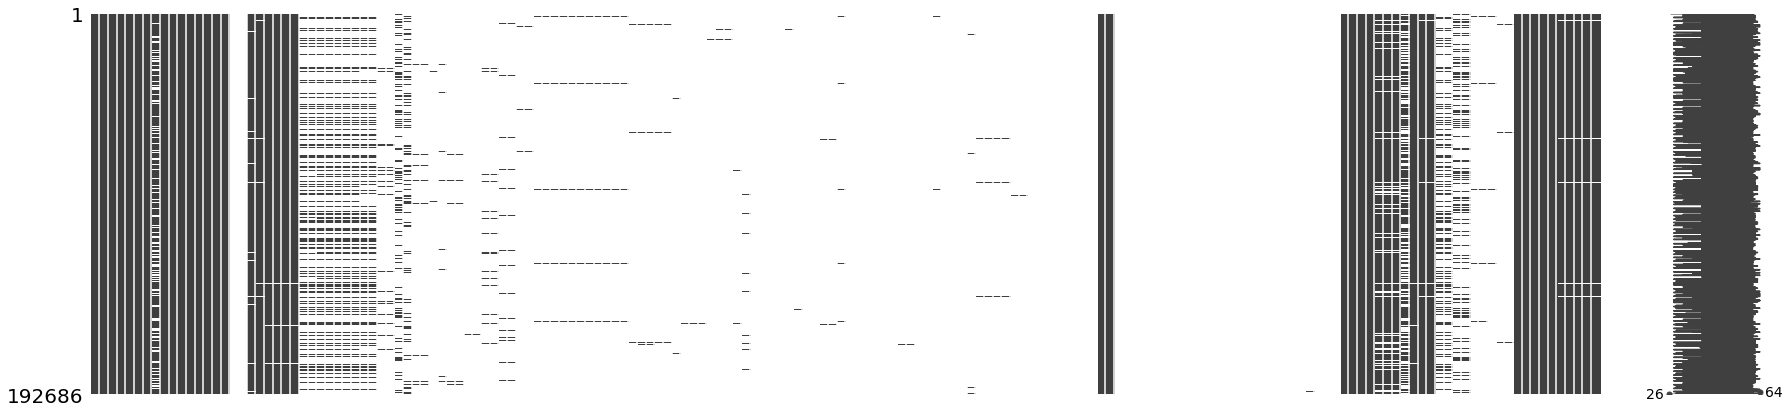

In [17]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_shots_raw
msno.matrix(df_events, figsize = (30, 7))

In [18]:
# Counts of missing values
null_value_stats = df_events.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

duration                             52722
tactics_formation                   192459
tactics_lineup                      192459
related_events                        7079
location                              1530
player_id                              847
player_name                            847
position_id                            847
position_name                          847
pass_recipient_id                   139964
pass_recipient_name                 139964
pass_length                         137866
pass_angle                          137866
pass_height_id                      137866
pass_height_name                    137866
pass_end_location                   137866
pass_body_part_id                   140732
pass_body_part_name                 140732
pass_type_id                        183873
pass_type_name                      183873
carry_end_location                  148886
under_pressure                      157154
duel_type_id                        189332
duel_type_n

---

<a id='section4'></a>

## <a id='#section4'>4. Analytical Summary</a>
This short analytical piece applies a data-driven approach with the aim of answering the question **‘England at EURO 2020: How Good Were They Actually?’**, by reviewing the performances of the Three Lions over the course of the tournament. Did they deserve to win the tournament? Or had they done well to finish as runner up?

---

The outstanding characteristic of Gareth Southgate’s England at EURO 2020 was a controlled playing style, built upon strong solid defensive foundations, that at times felt like the handbrake was on when going forward. However, it was a playing style that limited the opposition's potential attacking threat, avoiding any potential risks.

Breakdown:
4.1.    [Group Stages - Croatia, Scotland, and Czech Republic](#section4.1)<br>
4.2.    [Last Sixteen - Germany](#section4.2)<br>
4.3.    [Quarter Finals - Ukraine](#section4.3)<br>
4.4.    [Semi Finals - Denmark](#section4.4)<br>
4.5.    [The Final - Italy](#section4.5)<br>
4.6.    [Conclusions](#section4.6)<br>

<a id='section4.1'></a>

### <a id='#section4.1'>4.1. Group Stages - Croatia, Scotland, and Czech Republic</a>
Qualifying as winners of Group D, England went through to the knockout stages with 7 points and a perfect defensive record of 3 clean sheets. Nullifying the attacking potential of [Croatia](https://www.bbc.co.uk/sport/football/51197735) and the [Czech Republic](https://www.bbc.co.uk/sport/live/football/50941188).

findfont: Font family ['Alegreya Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Alegreya Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.


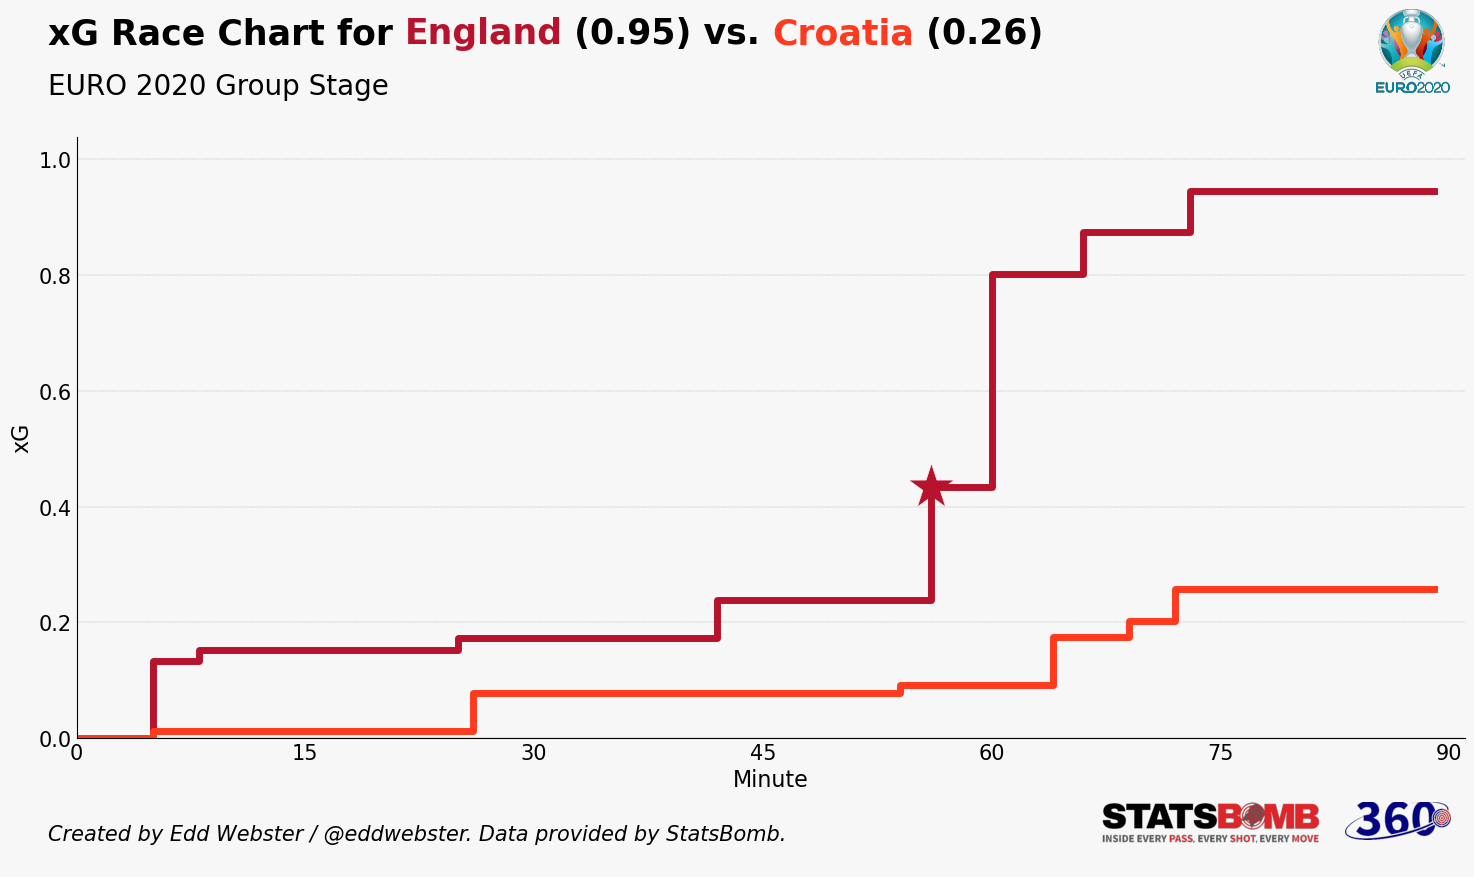

In [19]:
# xG Race Chart - England 1-0 Croatia (13/06/2021)
wviz.create_xg_race_chart(df=df_events,
                          home_team='England',
                          away_team='Croatia',
                          home_colour='#b8132d',
                          away_colour='#ff3a1e',
                          mins_limit=90,
                          subtitle='Group Stage',
                          x_dimensions=15,
                          y_dimensions=7
                         )

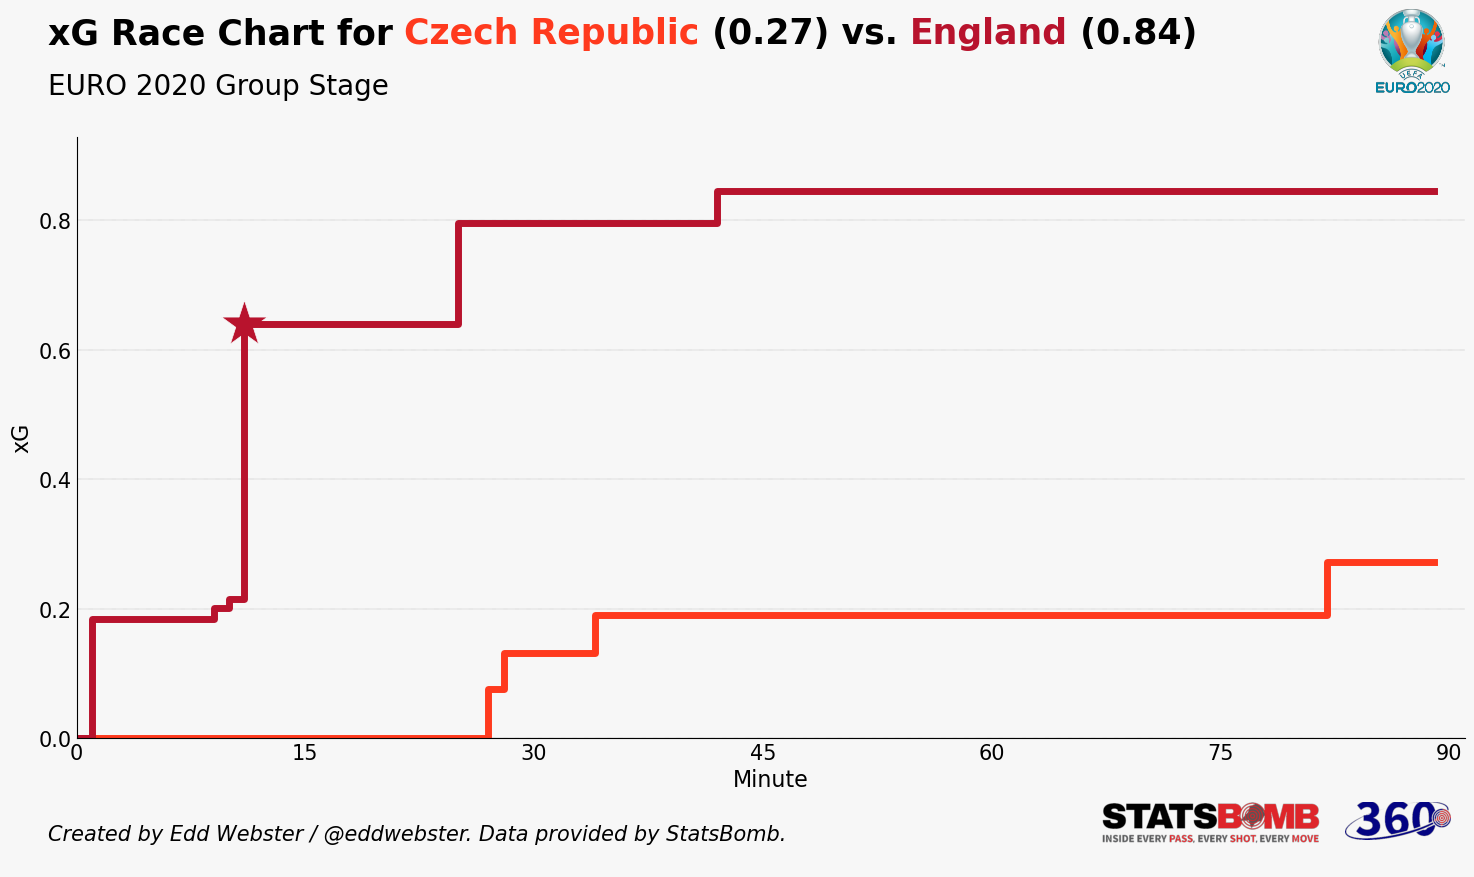

In [20]:
# xG Race Chart - Czech Republic 0-1 England (22/06/2021)
wviz.create_xg_race_chart(df=df_events,
                          home_team='Czech Republic',
                          away_team='England',
                          home_colour='#ff3a1e',
                          away_colour='#b8132d',
                          mins_limit=90,
                          subtitle='Group Stage',
                          x_dimensions=15,
                          y_dimensions=7
                         )

England looked less convincing in their second group game against [Scotland](https://www.bbc.co.uk/sport/football/51197603) (see the following figure). The tale of the tape shows that England didn’t create enough to deserve to win the game, Scotland creating chances of a similar level of quality, where snatching the three points would not have been completely out of the question.

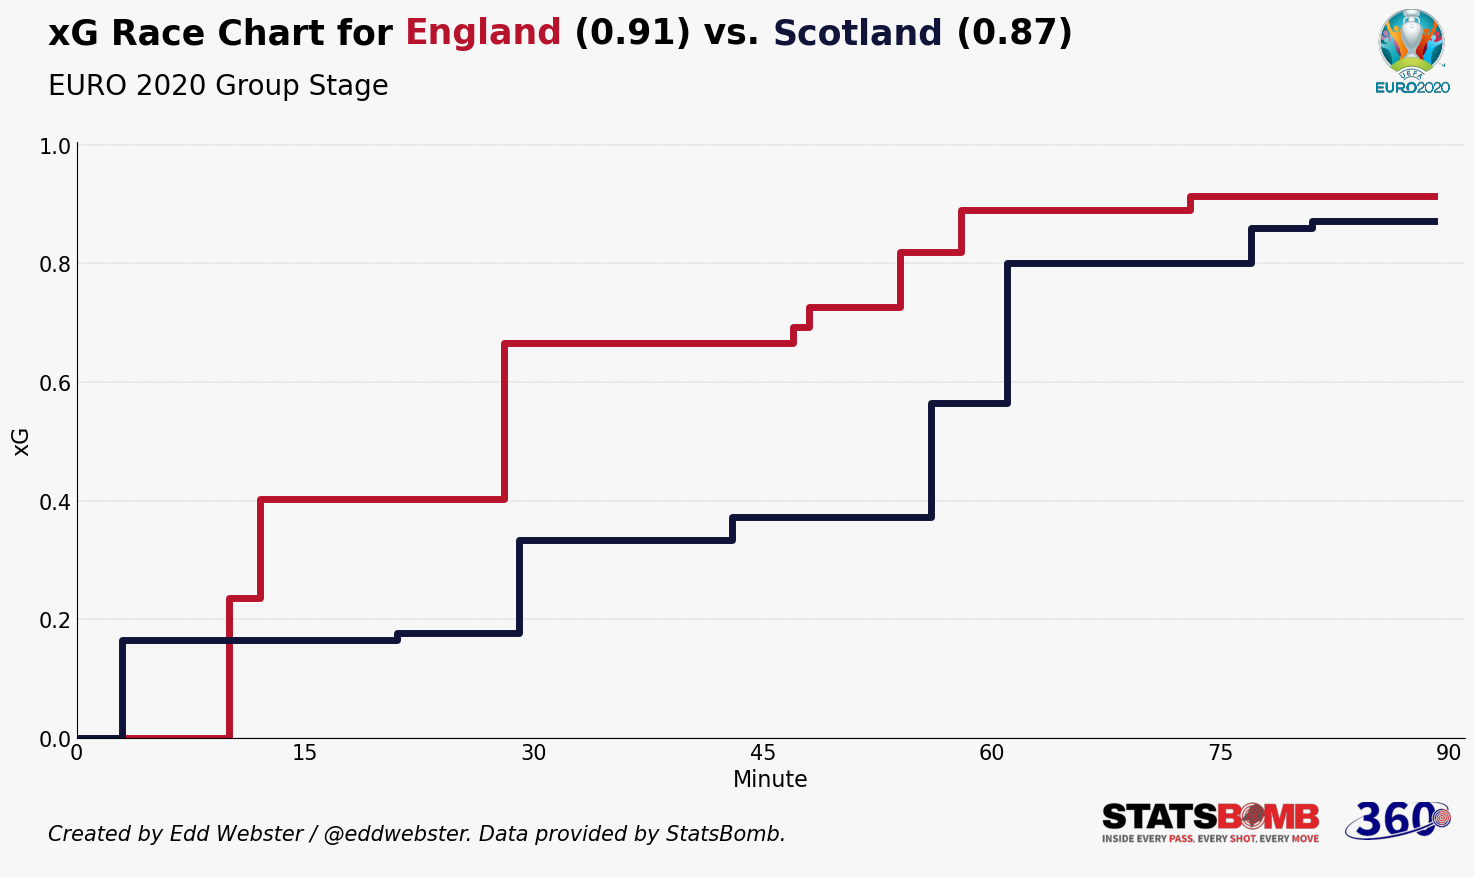

In [21]:
# xG Race Chart - England 0-0 Scotland (18/06/2021)
wviz.create_xg_race_chart(df=df_events,
                          home_team='England',
                          away_team='Scotland',
                          home_colour='#b8132d',
                          away_colour='#101439',
                          mins_limit=90,
                          subtitle='Group Stage',
                          x_dimensions=15,
                          y_dimensions=7
                         )

England weathered the Scottish storm and on completion of the Group Stage, were sitting just above mid-table for Expected Goal (xG) Difference (xG minus xG conceded). See the following figure:

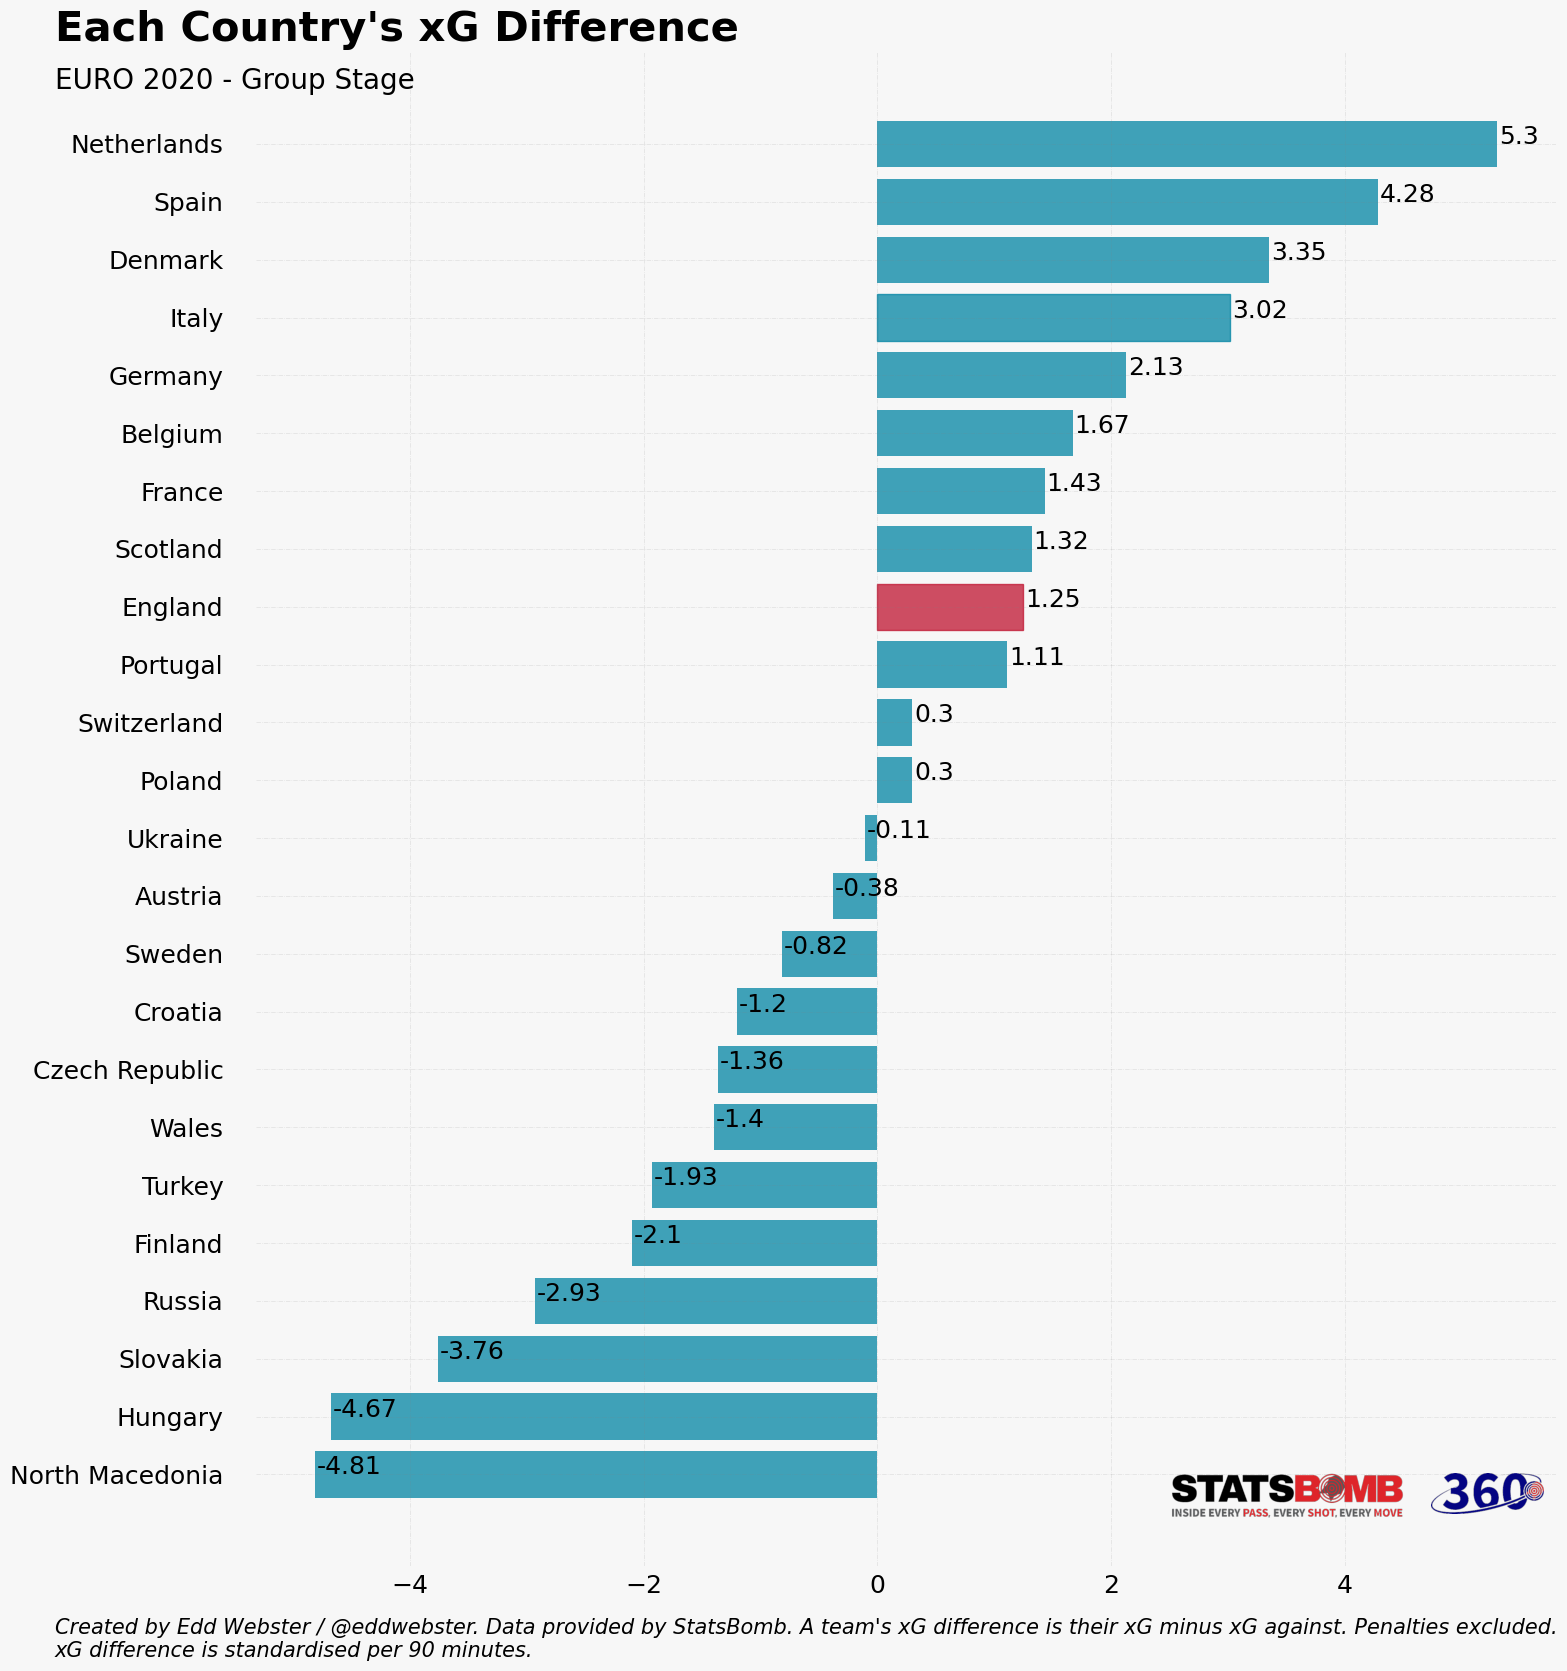

In [22]:
wviz.create_xg_diff_bar_chart(df=df_events,
                              date_start='2021-06-11',
                              date_end='2021-06-24',
                              value='xg_diff',    #'xg_diff_p90'
                              bar_colour='#0184a3',
                              selected_team_1=3,    #'Italy'    # currently selects by index
                              selected_team_1_colour='#0184a3',  #'#0c05fa' # commented out italy
                              selected_team_2=8,    #'England'
                              selected_team_2_colour='#c01430',
                              subtitle='Group Stage',
                              x_dimensions=16.5,
                              y_dimensions=10.5
                             )

When breaking down the Group Stage xG difference into its component parts, England finished second for xG conceded, behind only eventual winners Italy, supporting the famous quote by Sir Alex Ferguson of “Attack wins you games, defence wins you titles” (see [[link](https://www.youtube.com/watch?v=wBrkUX7RJ44)] for more information). This defensive solidity was the foundation in which Southgate’s men built for a deep run in the tournament.

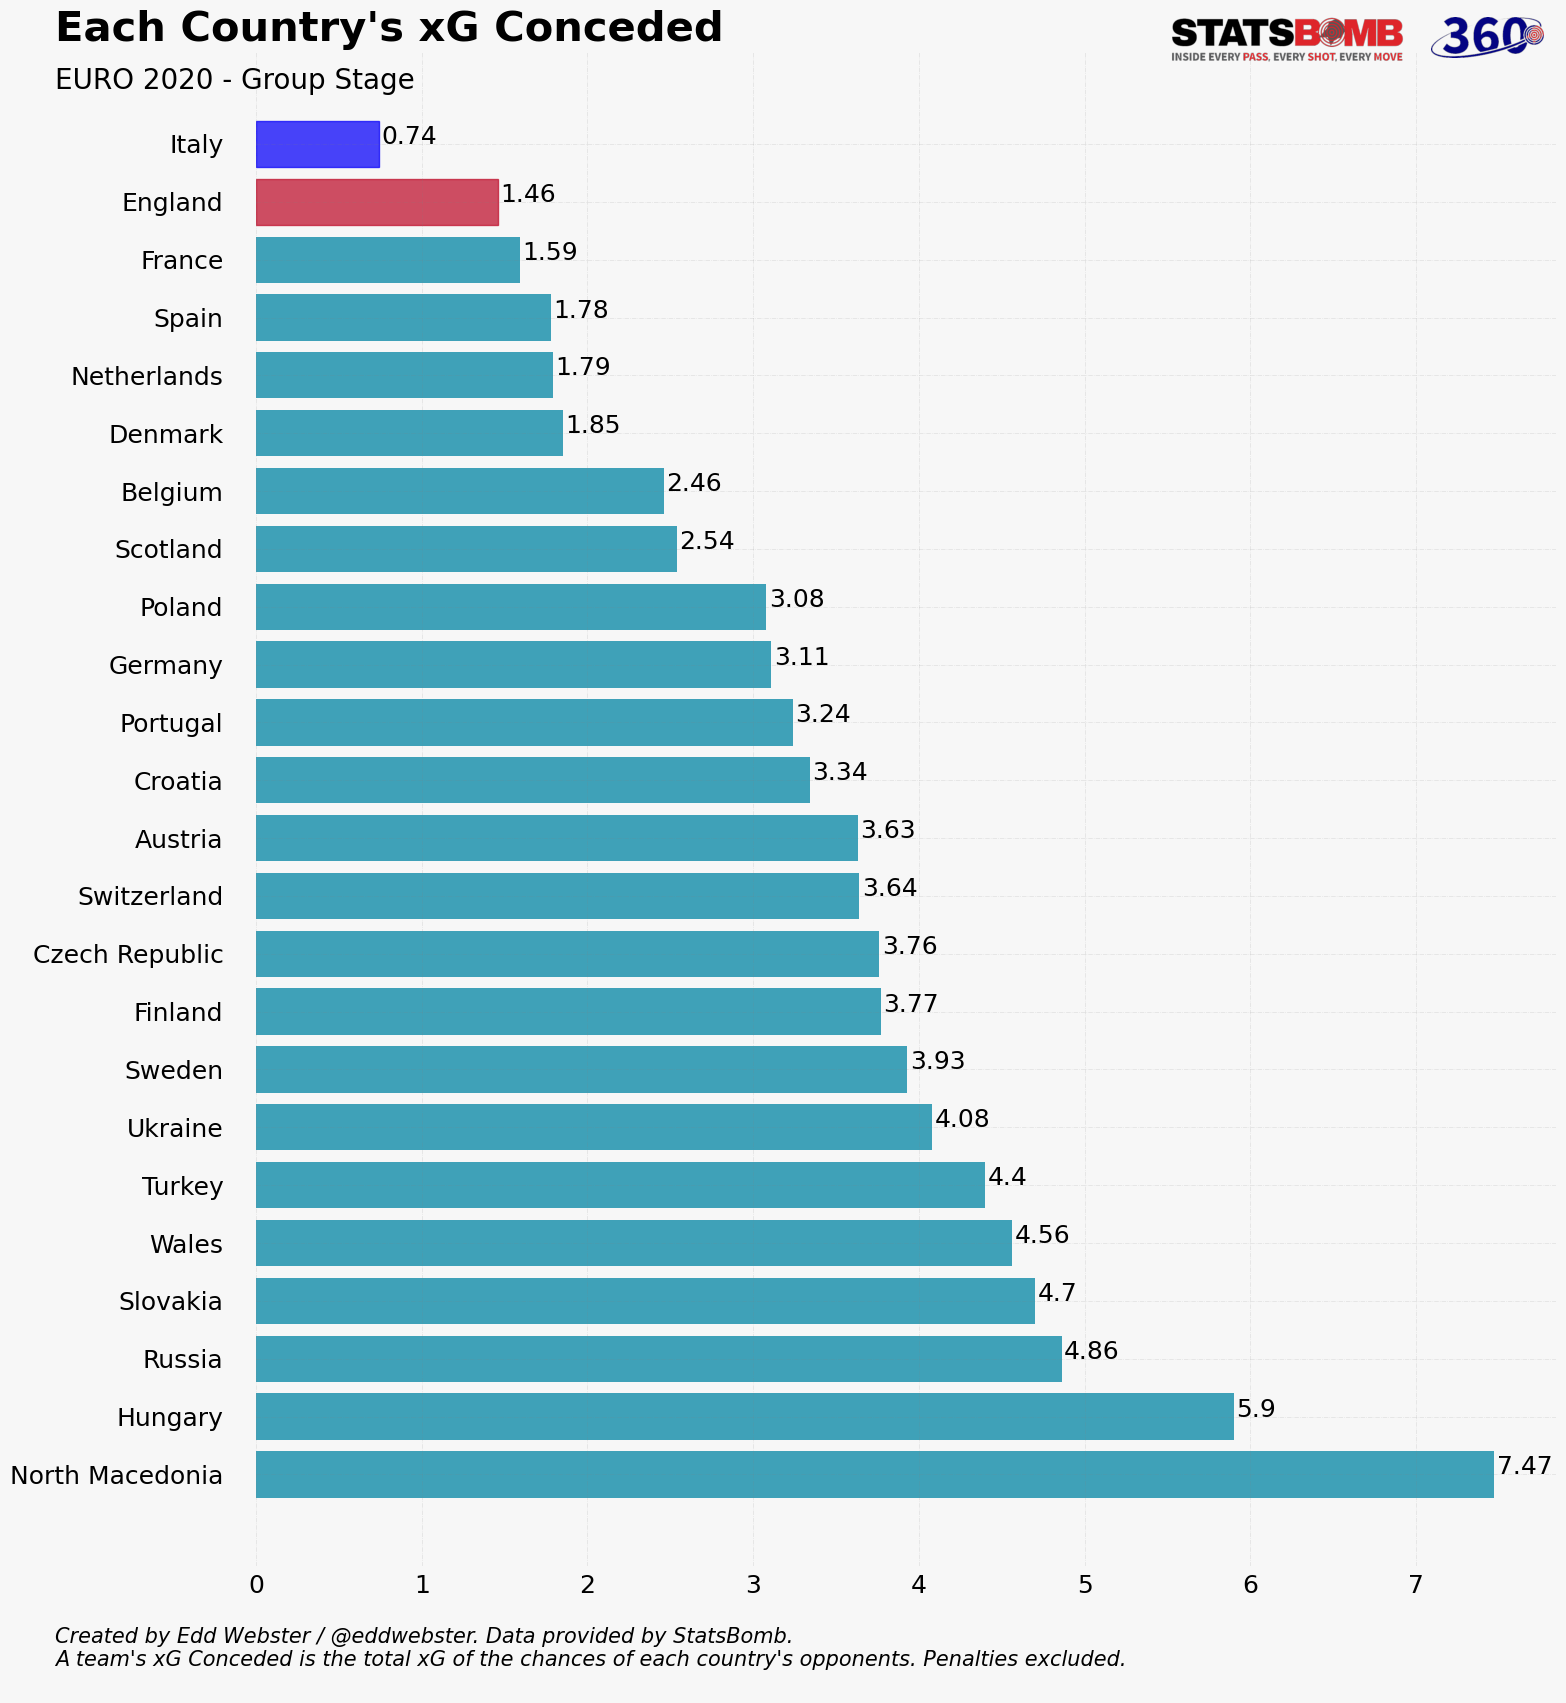

In [23]:
wviz.create_xga_bar_chart(df=df_events,
                          date_start='2021-06-11',
                          date_end='2021-06-24',
                          value='xga',
                          bar_colour='#0184a3',
                          selected_team_1=0,    #'Italy'     # currently selects by index
                          selected_team_1_colour='#0c05fa',
                          selected_team_2=1,    #'England'
                          selected_team_2_colour='#c01430',
                          subtitle = 'Group Stage',
                          x_dimensions=16.5,
                          y_dimensions=10.5
                         )

<a id='section4.2'></a>

### <a id='#section4.2'>4.2. Last Sixteen - Germany</a>
In the Last Sixteen, England faced their arch rivals – [Germany](https://www.bbc.co.uk/sport/football/51198606), a team that they had not beaten in knockout competition since winning the World Cup in 1966.

When viewed alongside the Group Stage performances, it would be easy to say that England contained the Germans. However, on balance, England were fortunate to progress through to the Quarter Finals, conceding a total xG (1.40) close to that of the three previous matches combined (1.46) and were fortunate that veteran German striker Thomas Müller fluffed his lines when breaching England’s defensive lines, dragging a 1v1 against Pickford wide in what proved to be the highest quality chance of the game (0.432 xG). This game demonstrate how in single matches, football can be a game of fine margins.

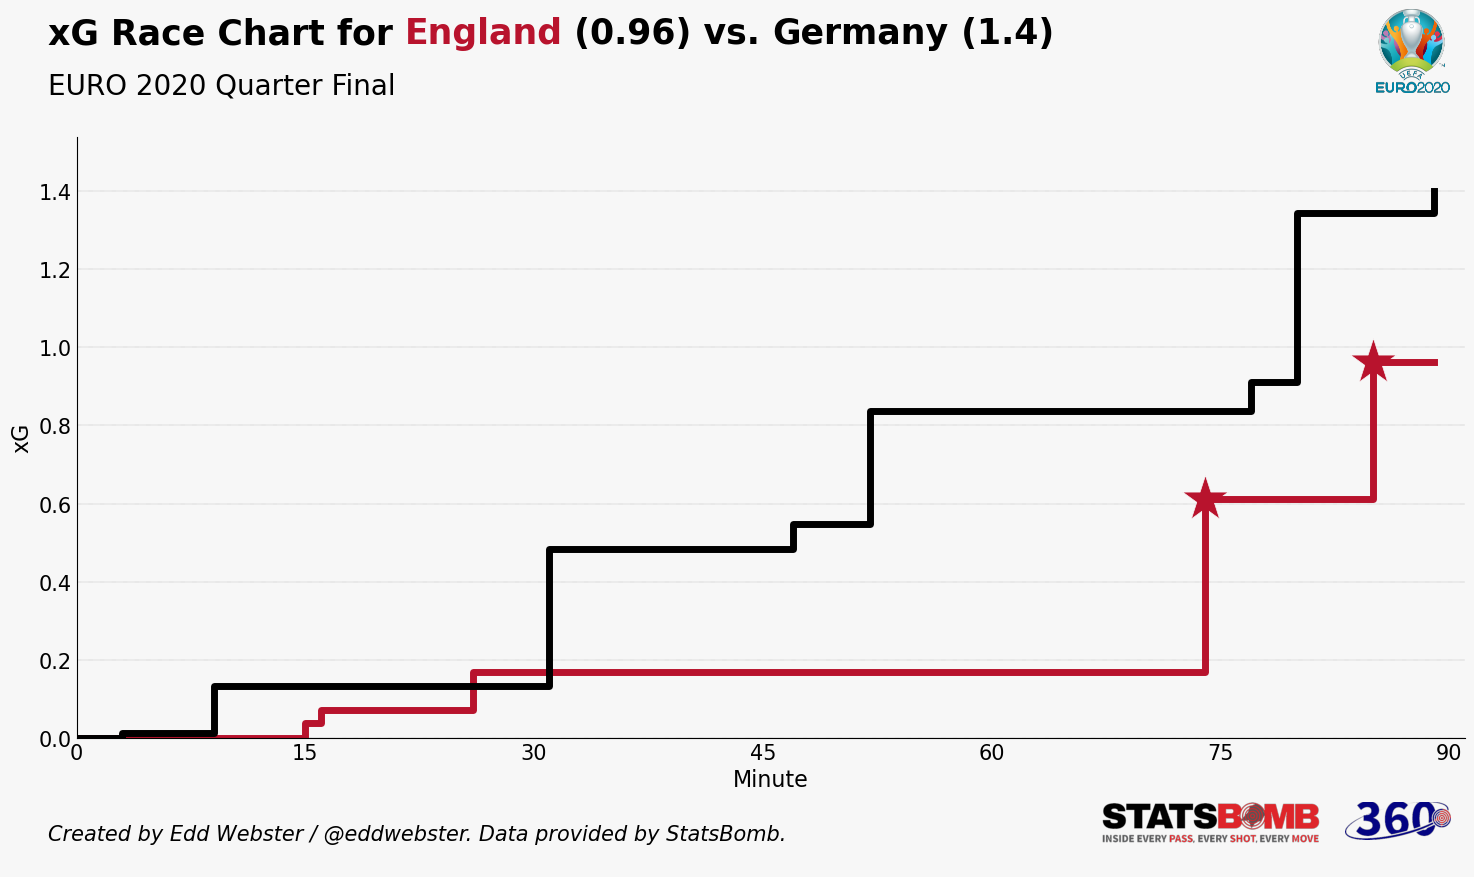

In [24]:
# xG Race Chart - England 2-0 Germany (29/06/2021)
wviz.create_xg_race_chart(df=df_events,
                          home_team='England',
                          away_team='Germany',
                          home_colour='#b8132d',
                          away_colour='#000000',
                          mins_limit=90,
                          subtitle='Quarter Final',
                          x_dimensions=15,
                          y_dimensions=7
                         )

England capitalised on Müller’s mistake, Luke Shaw justifying his selection ahead of Ben Chillwell to assist Sterling for England's first (75 min, 0.441 xG). Shaw was a vital outlet for England during their campaign, their best creator for OBV, finishing 10th for On-Ball Value Contribution for passes, carries and dribbles during the tournament, notably just behind Italy’s left wing-back Leonardo Spinazzola, who went on to feature in the team of the tournament.

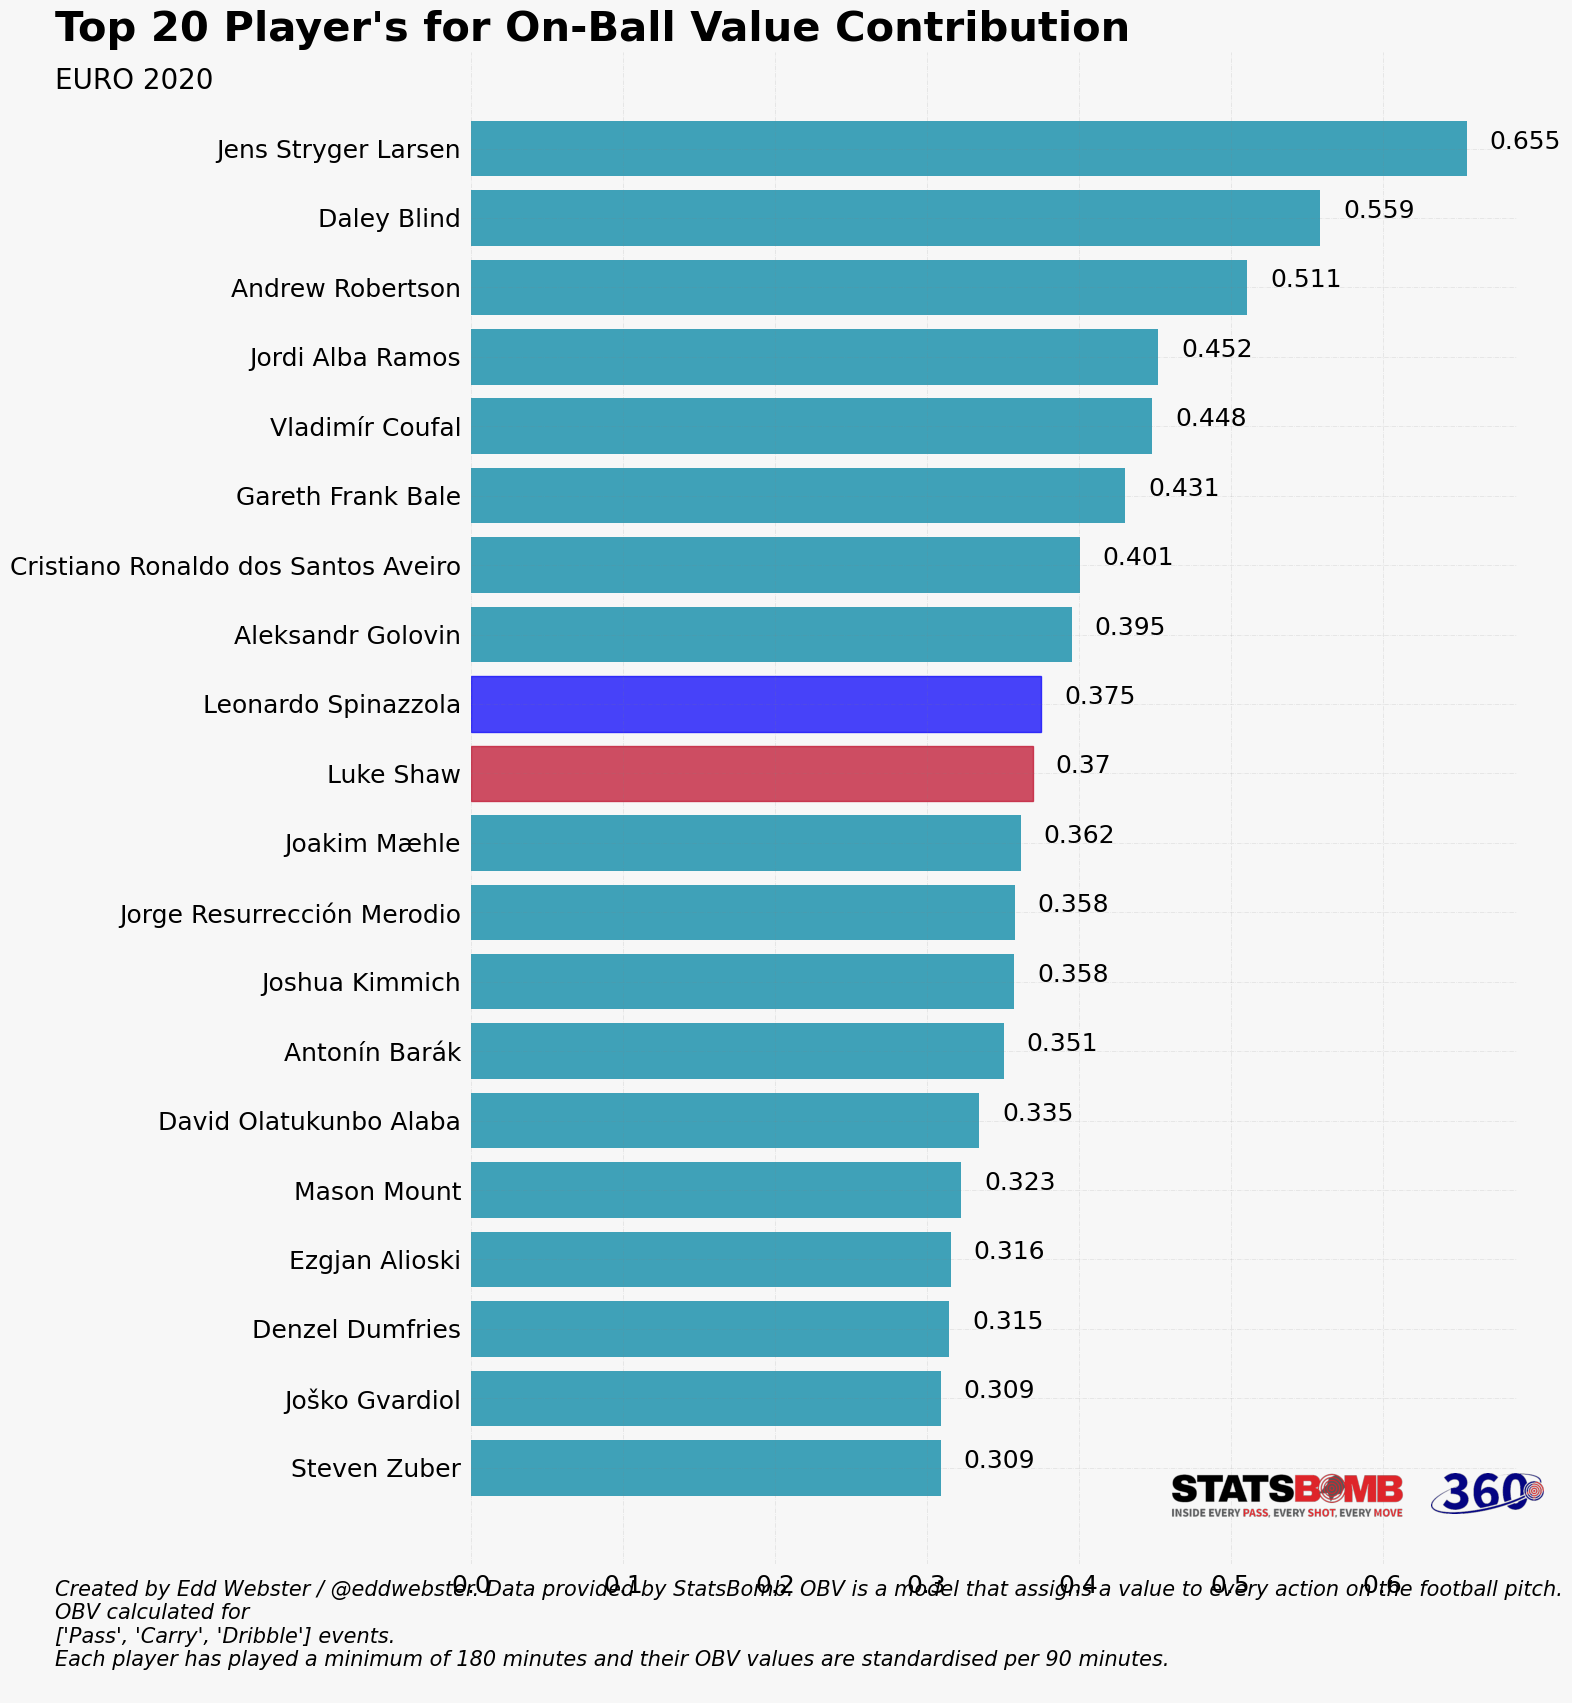

In [25]:
wviz.create_obv_players_bar_chart(df=df_events,
                                  lst_actions=[
                                               'Pass',
                                               'Carry',
                                              #'Duel',
                                              #'Dispossessed',
                                               'Dribble',
                                              #'Ball Recovery',
                                              #'Interception',
                                              #'Shot',
                                              #'Goal Keeper',
                                              #'Block',
                                              #'Clearance',
                                              #'Miscontrol',
                                              #'Foul Won',
                                              #'50/50'
                                              ],
                                  count_players=20,
                                  bar_colour='#0184a3',
                                  mins_limit=180,
                                  selected_player_1=8,
                                  selected_player_1_colour='#0c05fa',
                                  selected_player_2=9,
                                  selected_player_2_colour='#c01430',
                                  x_dimensions=16.5,
                                  y_dimensions=10.5
                                 )

findfont: Font family ['Alegreya Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.


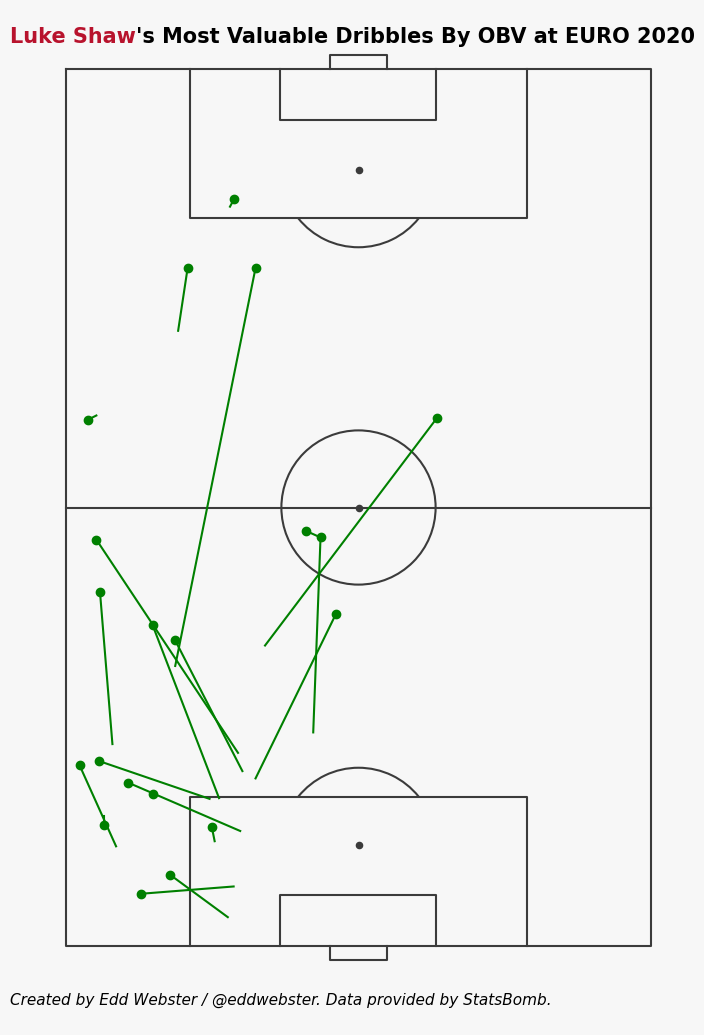

In [26]:
wviz.create_obv_carries_player(df=df_events,
                               player_name='Luke Shaw',
                               team_colour='#b8132d',
                               successful_carry_colour='green',
                               unsuccessful_carry_colour='red',
                               pitch_length_x=120,
                               pitch_length_y=80,
                               orientation='vertical', #'horizontal', #'vertical'
                               aspect='fll',
                               n_carries=20,
                               x_dimensions=5.25,
                               y_dimensions=8.25
                              )

It was against Germany that Harry Kane finally opened his account for the tournament (85 min, 0.351 xG), eventually missing out on the golden boot to Cristiano Ronaldo (5 goals), a sign of better fortune for England in front of goal. Kane finished with the highest xG per 90 of all players during the Knockout Stages. In comparison, Italy's Ciro Immobile, who was largely absent in the final, was 15th.

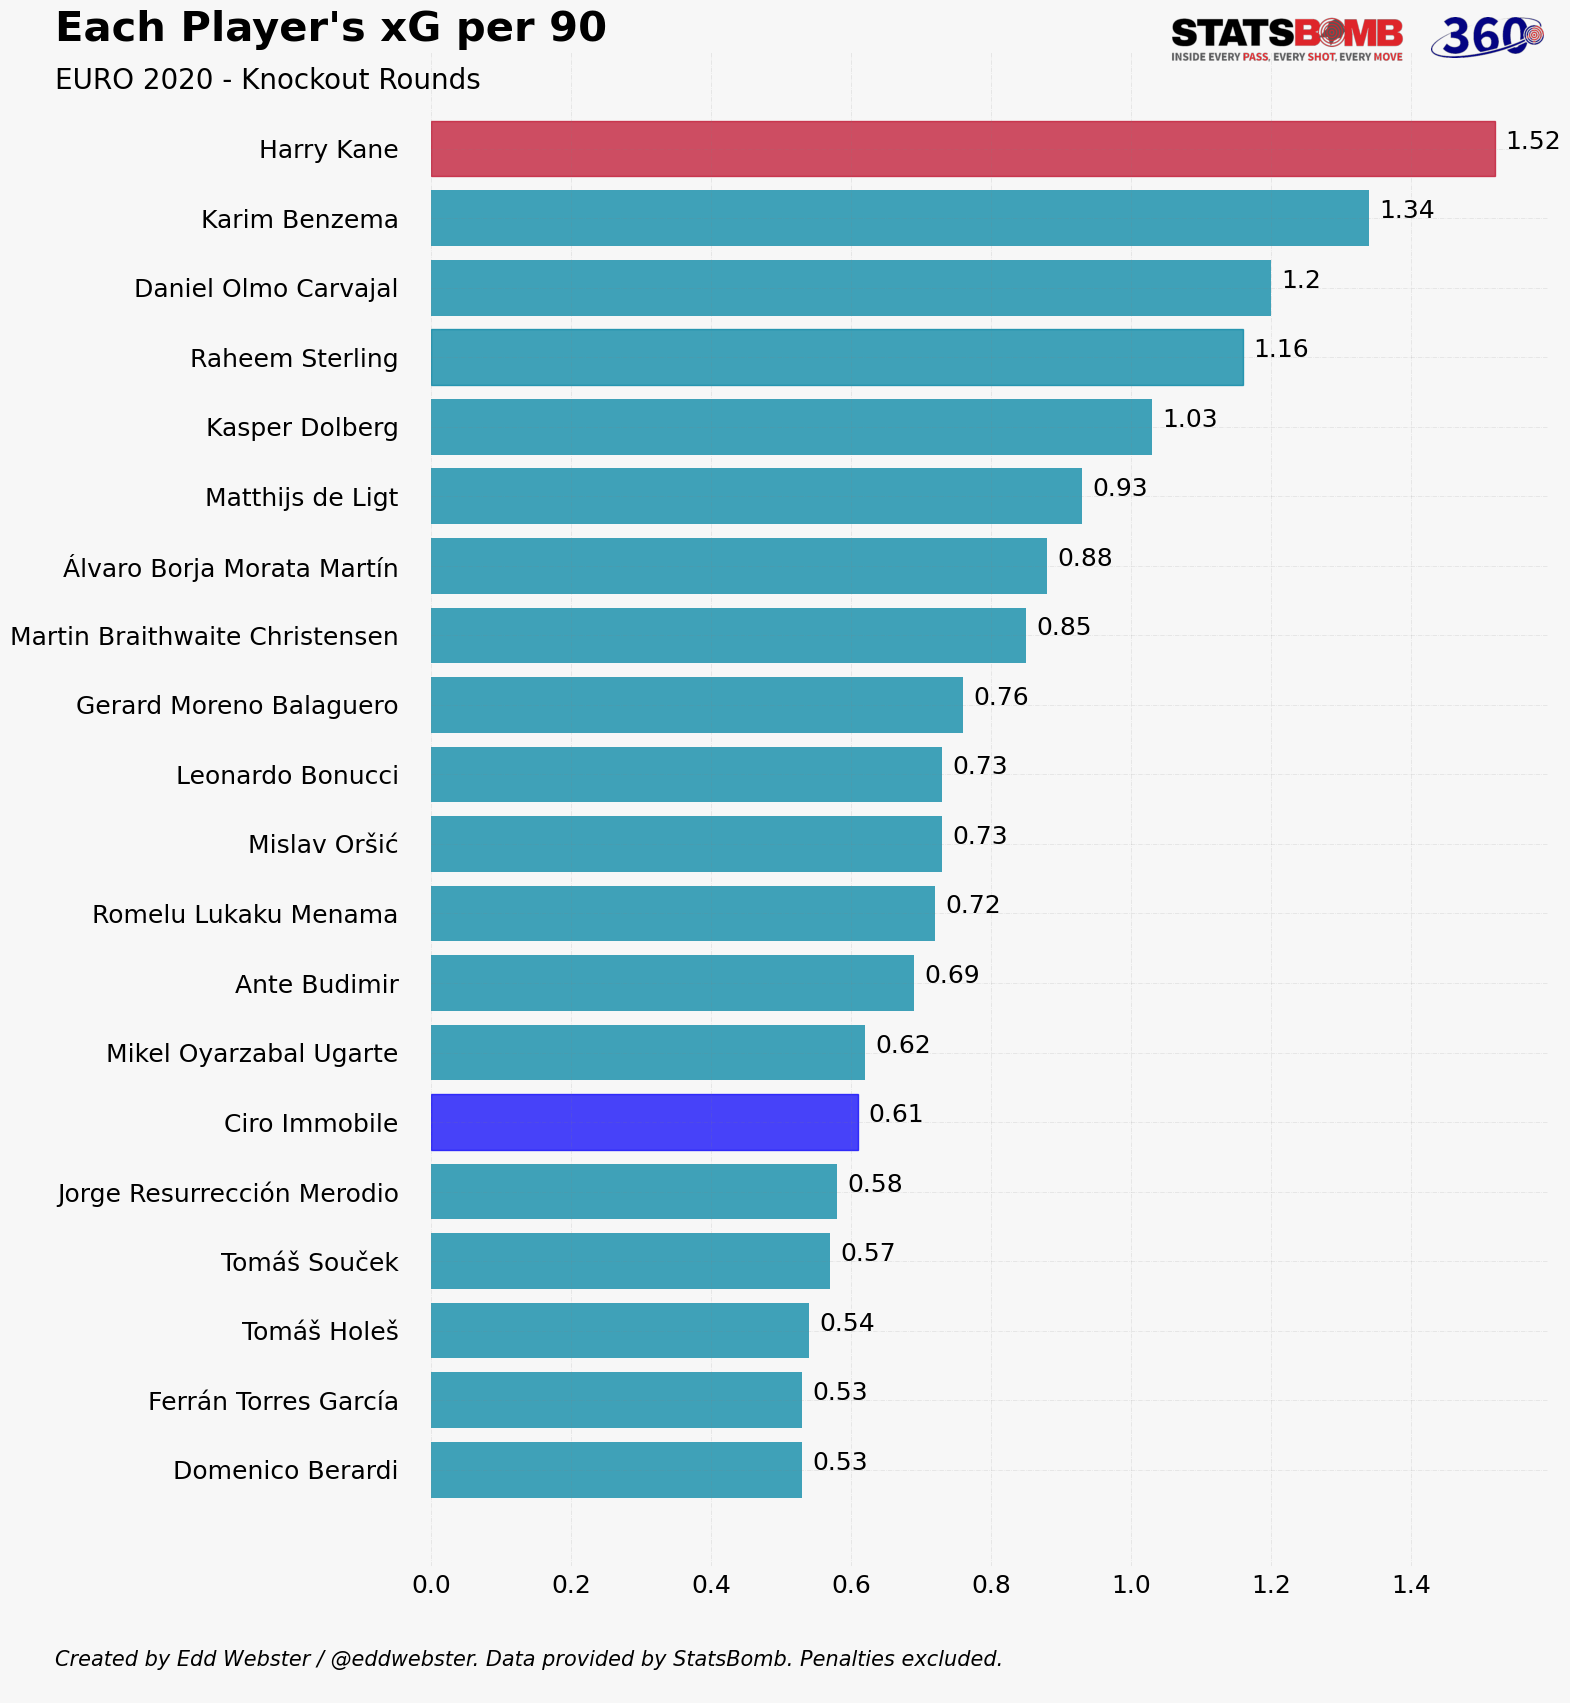

In [27]:
wviz.create_xg_bar_chart_player(df=df_events,
                                date_start='2021-06-25',
                                date_end='2021-07-24',
                                value='xg_p90',
                                bar_colour='#0184a3',
                                count_players=20,
                                selected_player_1=0,
                                selected_player_1_colour='#c01430',
                                selected_player_2=3,
                                selected_player_2_colour='#0184a3',   # used '#c01430' to highlight Sterling
                                selected_player_3=14,
                                selected_player_3_colour='#0c05fa',
                                title='xG per 90',
                                subtitle = 'Knockout Rounds',
                                x_dimensions=16.5,
                                y_dimensions=10.5
                               )

findfont: Font family ['Alegreya Sans'] not found. Falling back to DejaVu Sans.


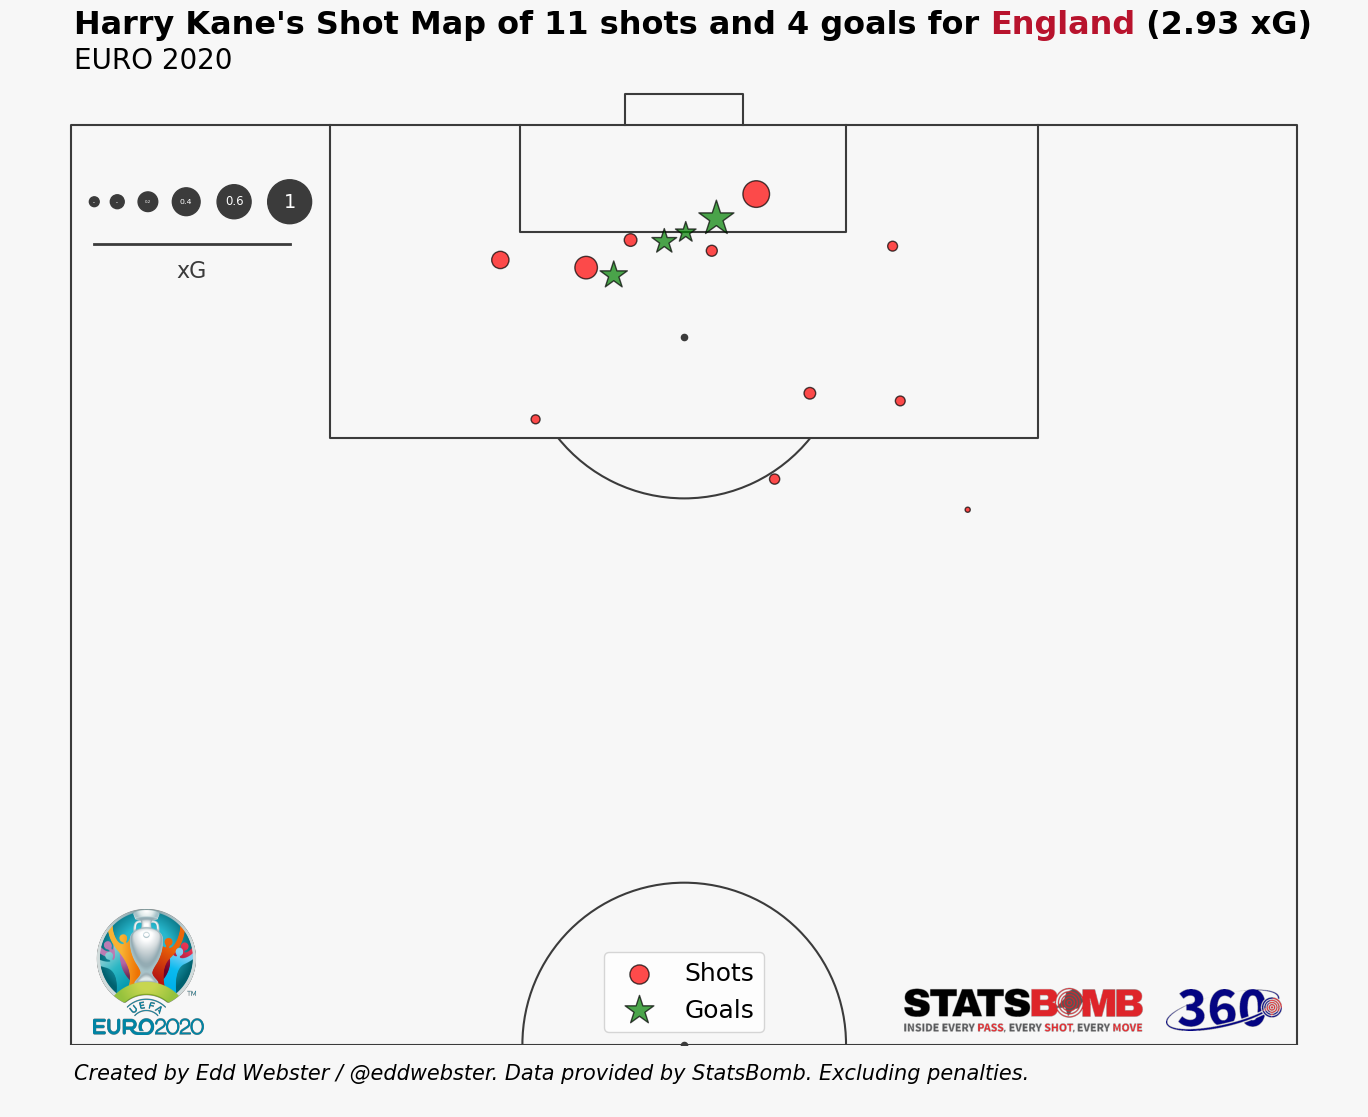

In [28]:
wviz.create_shot_map_player(df=df_events,
                            player_name='Harry Kane',
                            team_of_interest='England',
                            team_colour='#b8132d',
                            pitch_length_x=120,
                            pitch_length_y=80,
                            orientation='vertical',
                            aspect='half',
                            x_dimensions=16.5, 
                            y_dimensions=10.5
                           )

<a id='section4.3'></a>

### <a id='#section4.3'>4.3. Quarter Finals - Ukraine</a>
The following game for England again [Ukraine](https://www.bbc.co.uk/sport/football/51198691) was as routine a win as one could hope for in a Quarter Final. 4 goals - a Harry Kane brace and two instances of classic, England set-piece choreography. England’s win demonstrated an ability to both contain teams, as they had shown in the Group Stages against Croatia and the Czech Republic, whilst also showing more of their potential going forward.

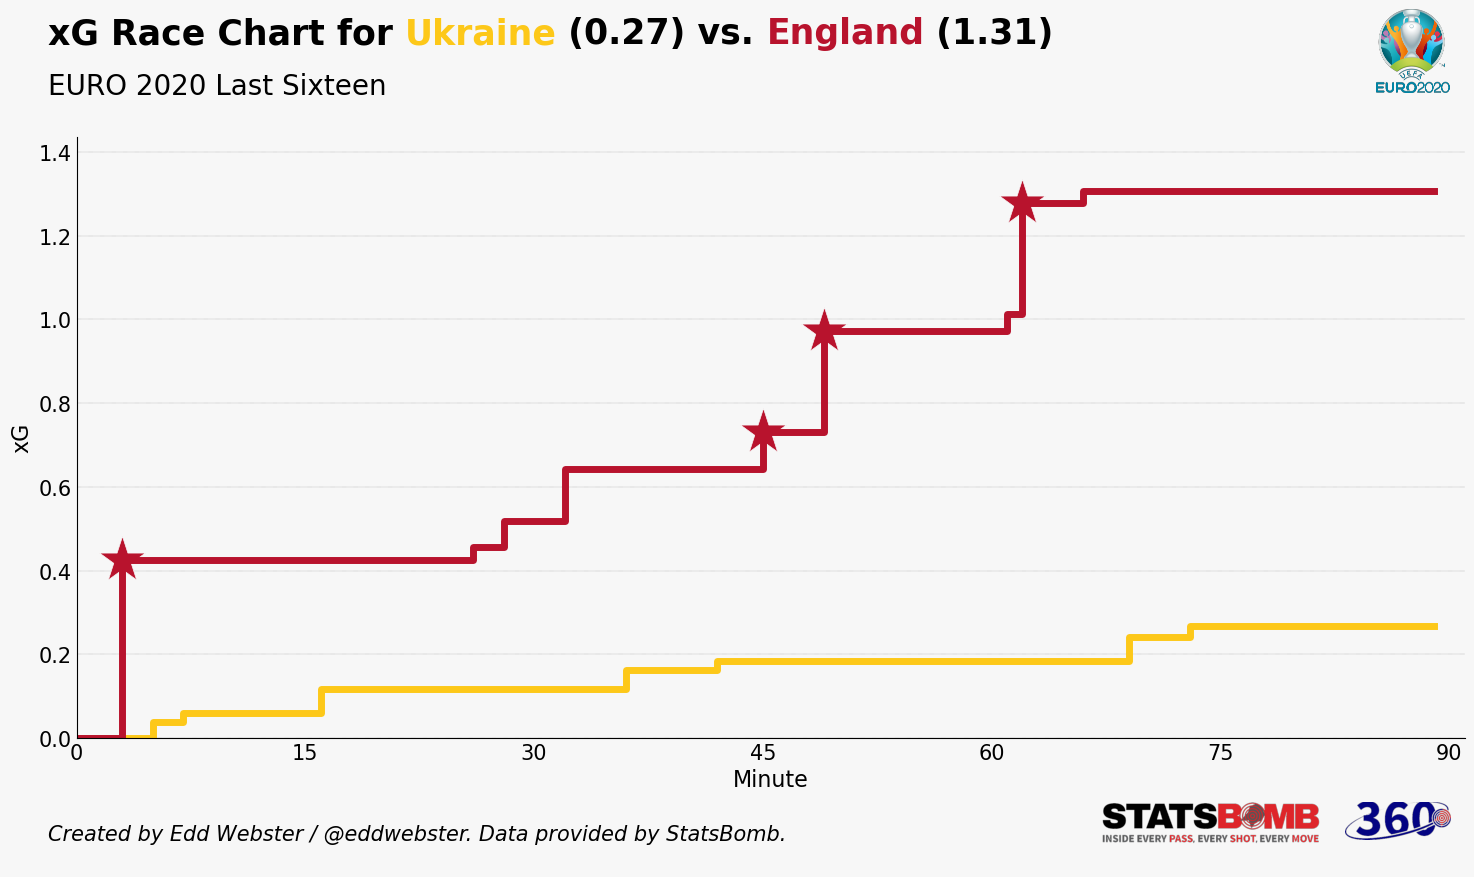

In [29]:
# xG Race Chart - Ukraine 0-4 England (03/07/2021)
wviz.create_xg_race_chart(df=df_events,
                          home_team='Ukraine',
                          away_team='England',
                          home_colour='#fdc819',
                          away_colour='#b8132d',
                          mins_limit=90,
                          subtitle='Last Sixteen',
                          x_dimensions=15,
                          y_dimensions=7
                         )

Post the Group Stage, England’s Expected Goals per 90 was joint 6th, trailing only to France, Croatia and Spain - France losing in the round of 16 to Switzerland 5-3 AET (3-3 FT) and Spain beating Croatia 5-3 AET (3-3 FT) in the round of 16, going on to lose Italy on penalties in the Semi Final. The Italians finished 5th, most likely dropping slightly because, like England, they went a way the tournament and played the highest calibre of opposition.

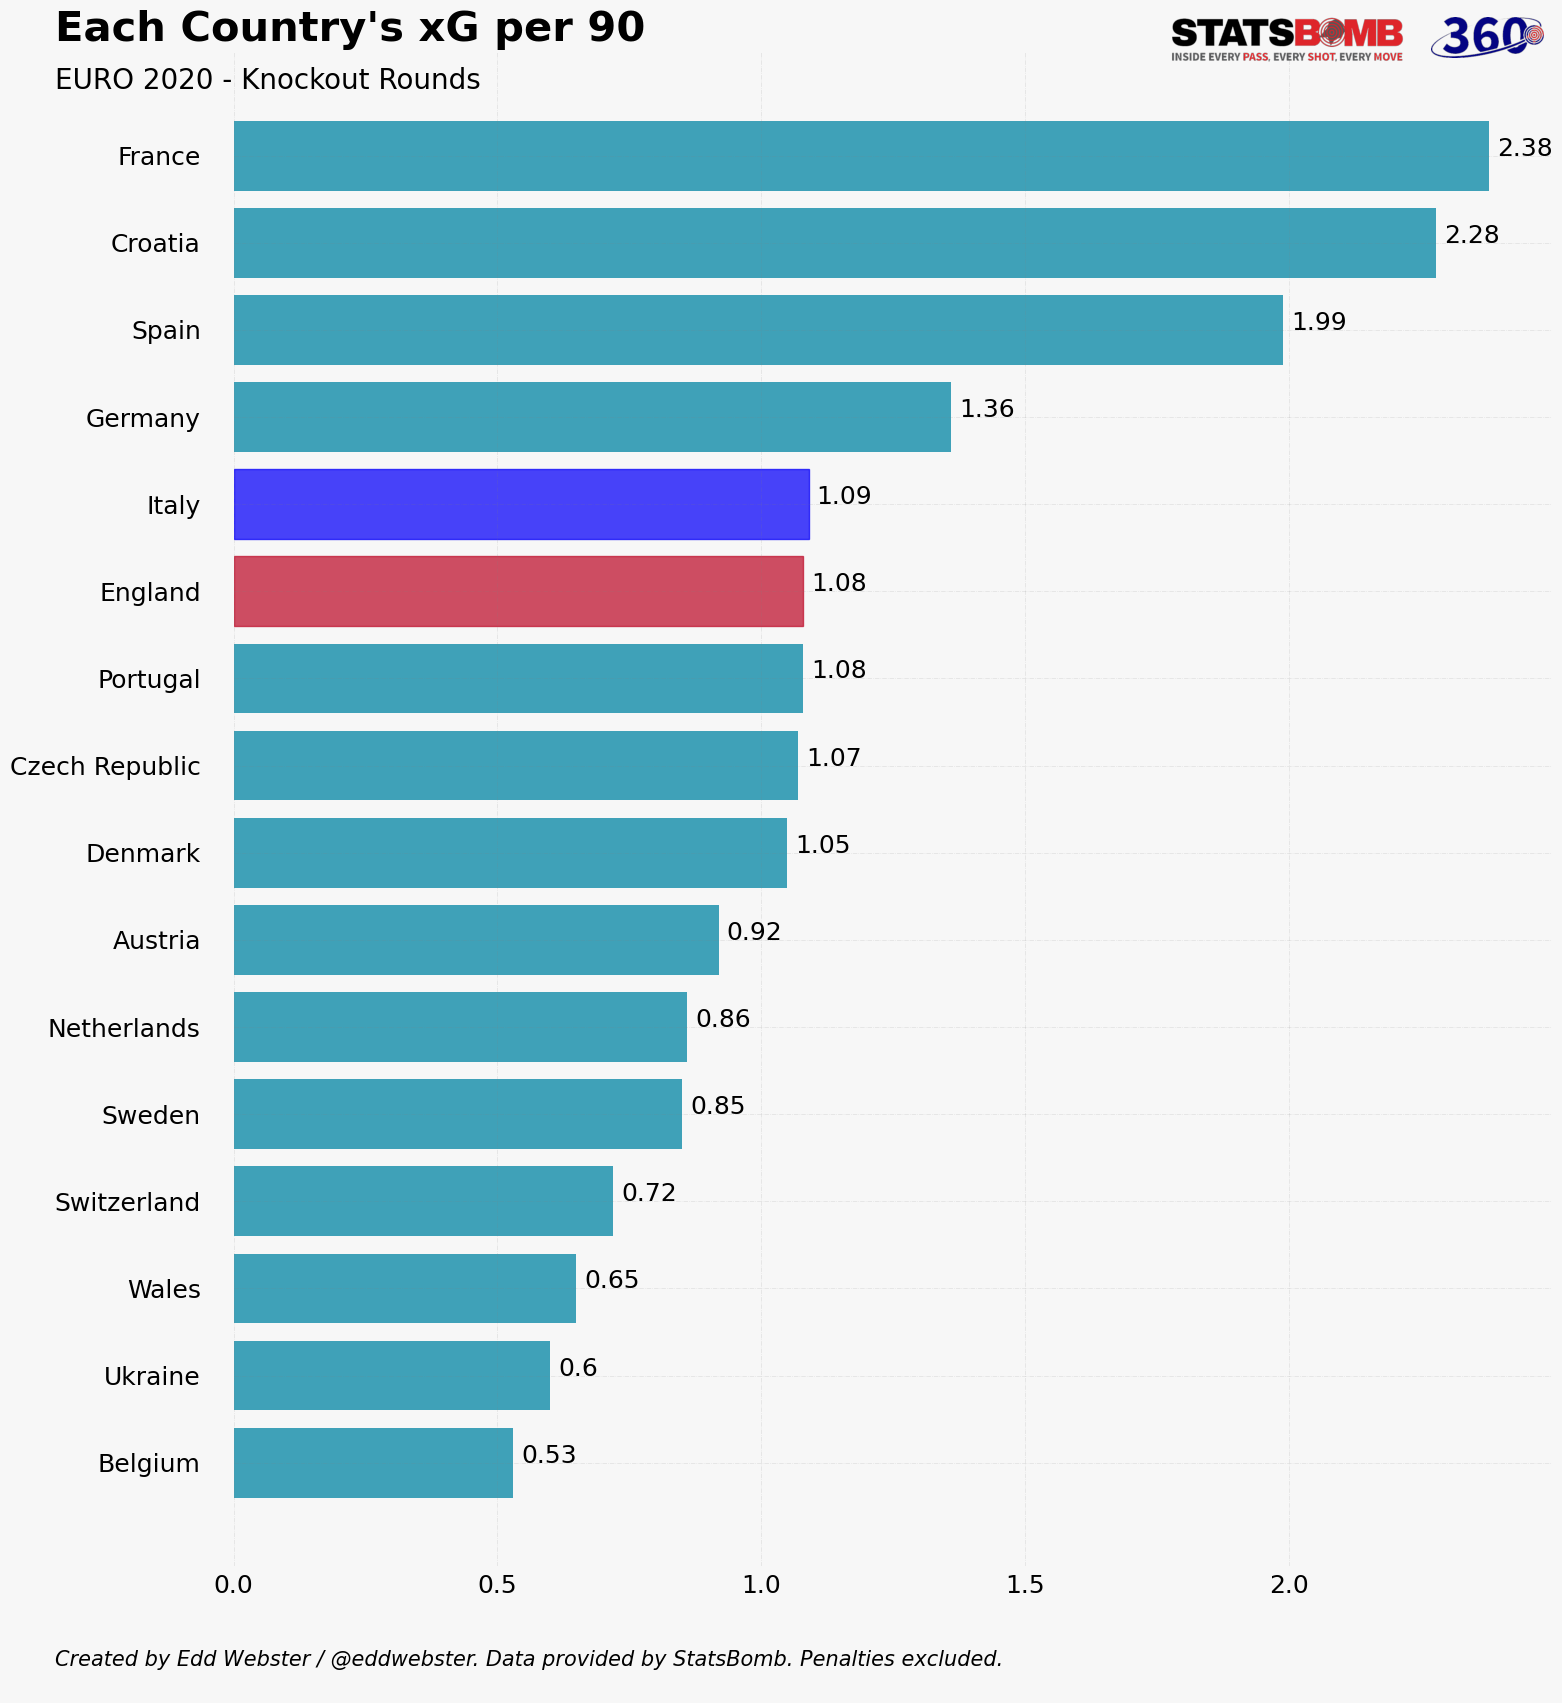

In [30]:
wviz.create_xg_bar_chart(df=df_events,
                         date_start='2021-06-25',
                         date_end='2021-07-24',
                         value='xg_p90',
                         bar_colour='#0184a3',
                         selected_team_1=4,    #'Italy'     # currently selects by index
                         selected_team_1_colour='#0c05fa',  # commented out italy
                         selected_team_2=5,    #'England'
                         selected_team_2_colour='#c01430',
                         title='xG per 90',
                         subtitle = 'Knockout Rounds',
                         x_dimensions=16.5,
                         y_dimensions=10.5
                        )

<a id='section4.4'></a>

### <a id='#section4.4'>4.4. Semi Finals - Denmark</a>
It was against [Denmark](https://www.bbc.co.uk/sport/football/51198755) that England’s defence was finally breached, with the Three Lions requiring 30 minutes of Extra Time to get the job done. Mikkel Damsgaard’s dipping free kick (29 min, 0.110 xG) was not enough to tame the Three Lions, Saka’s driven cross across the box forcing Simon Kjær to turn the ball into his own net (39 min) and Harry Kane putting the rebound from his tame penalty in Extra Time (104 min, 0.704 xG), ending the Dane’s hopes of repeating their 1992 EURO success. England had gone one-better than their 2018 World Cup performance, reaching their first major final since they had won the World Cup in 1966.

![England 1-1 Denmark (2-1 AET)](../img/fig/xg_race_map_England_Denmark.png)

*Note: the race chart doesn’t include a star for England’s goal scored in the 39th, that resulted in an Own Goal scored by Simon Kjær of Denmark.*

<a id='section4.5'></a>

### <a id='#section4.5'>4.5. The Final - Italy</a>
In the final, England had a dream start against [Italy](https://www.bbc.co.uk/sport/football/51198762), their two full-backs linking, a Trippier cross driven in at Gianluigi Donnarumma’s near post by Luke Shaw, to score his first goal for England and the fastest goal ever in a final of the Euros (2 mins, 0.182 xG). 

Following the goal, England resorted to the defensive tactics that had served so well throughout the tournament, with little attacking intent, failing to register another shot for the remainder of the first half.

![Italy 1-1 England (3-2 on pens))](../img/fig/xg_race_map_Italy_England.png)

The match encapsulated the saying "football is a game of two halves" and after the break, Italy regrouped, Nicolo Barella and Circo Immobile were sent for early baths, replaced by Bryan Cristante and Domenico Berardi. This tactical and personnel change allowed Italy to dominate the midfield. Italy played as a 4-3-3, with Lorenzo Insigne coming in from the left-hand-side to act as a false 9, switching with Chiesa who also came in from the right-hand side to have more of an impact through the middle.

findfont: Font family ['Alegreya Sans'] not found. Falling back to DejaVu Sans.


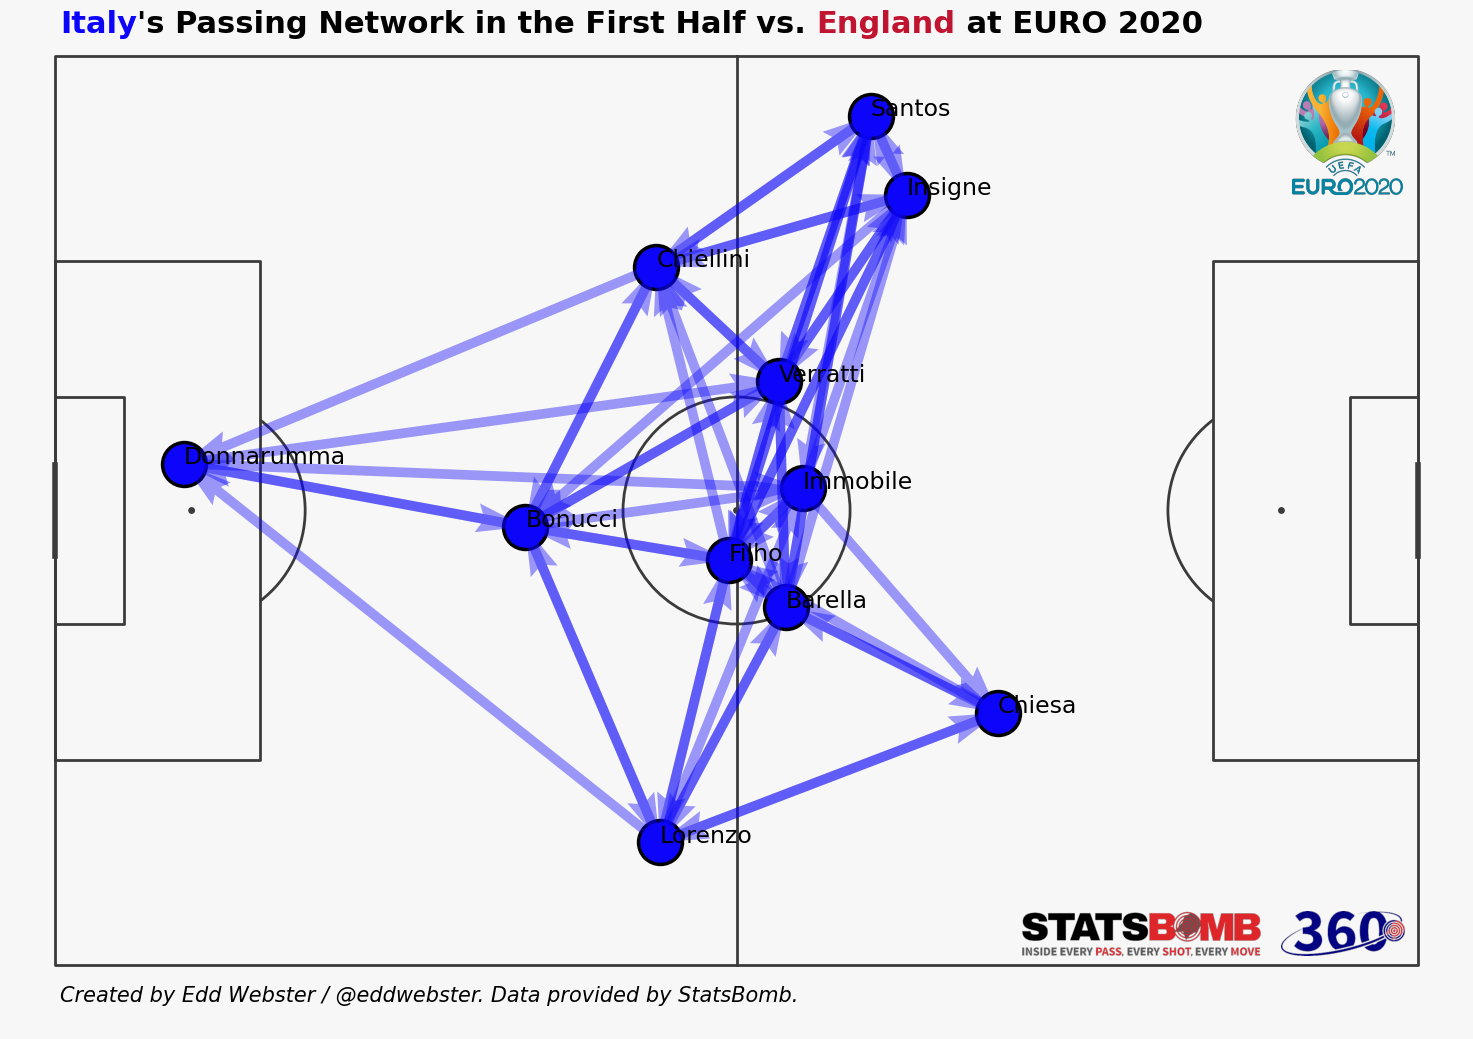

In [31]:
wviz.create_passing_network(df=df_events,
                            home_team='Italy',
                            away_team='England',
                            passing_network_team='Italy',
                            opponent='England',
                            passing_network_team_colour='#0c05fa',
                            opponent_colour='#c01430',
                            node_colour='#0c05fa',
                            arrow_colour='#0c05fa',
                            minute_start=1,
                            minute_end=45,
                            pitch_length_x=120,
                            pitch_length_y=80,
                            pass_threshold=2,
                            orientation='horizontal',
                            aspect='fll',
                            players_to_exclude = ['Bryan Cristante', 'Federico Bernardeschi', 'Andrea Belotti', 'Manuel Locatelli', 'Alessandro Florenzi'],
                            title = 'in the First Half',
                            subtitle='Final',
                            x_dimensions=16.5,
                            y_dimensions=10.5
                           )

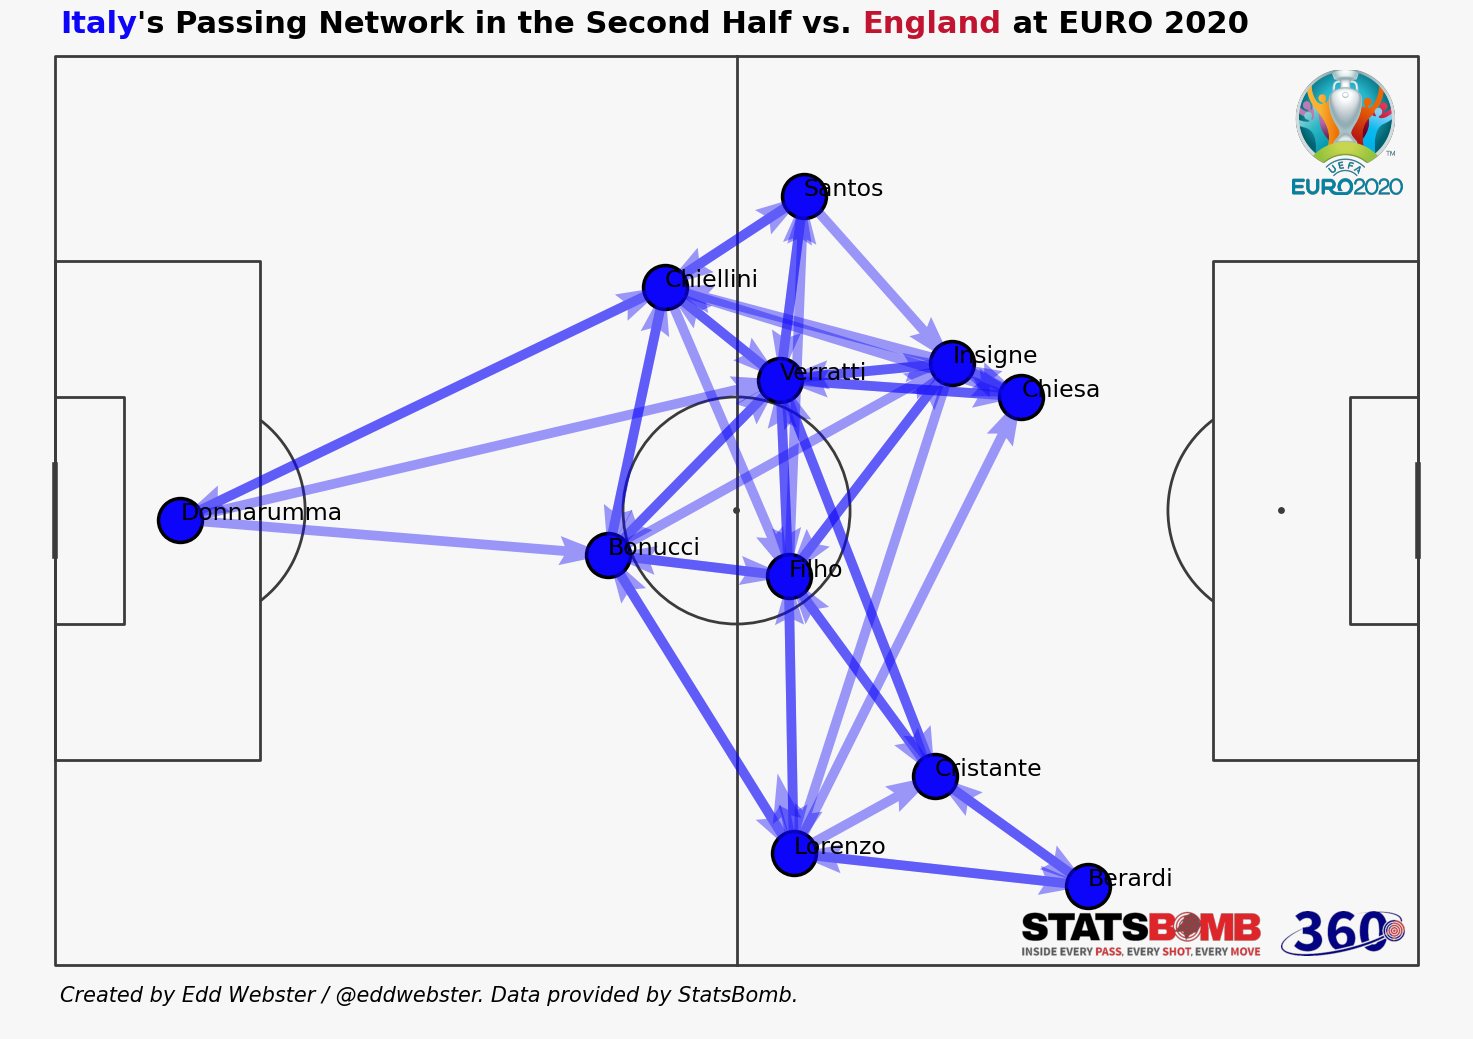

In [32]:
wviz.create_passing_network(df=df_events,
                            home_team='Italy',
                            away_team='England',
                            passing_network_team='Italy',
                            opponent='England',
                            passing_network_team_colour='#0c05fa',
                            opponent_colour='#c01430',
                            node_colour='#0c05fa',
                            arrow_colour='#0c05fa',
                            minute_start=46,
                            minute_end=90,
                            pitch_length_x=120,
                            pitch_length_y=80,
                            pass_threshold=2,
                            orientation='horizontal',
                            aspect='fll',
                            players_to_exclude = ['Ciro Immobile', 'Nicolò Barella', 'Federico Bernardeschi', 'Andrea Belotti', 'Manuel Locatelli', 'Alessandro Florenzi'],
                            title = 'in the Second Half',
                            subtitle='Final',
                            x_dimensions=16.5,
                            y_dimensions=10.5
                           )

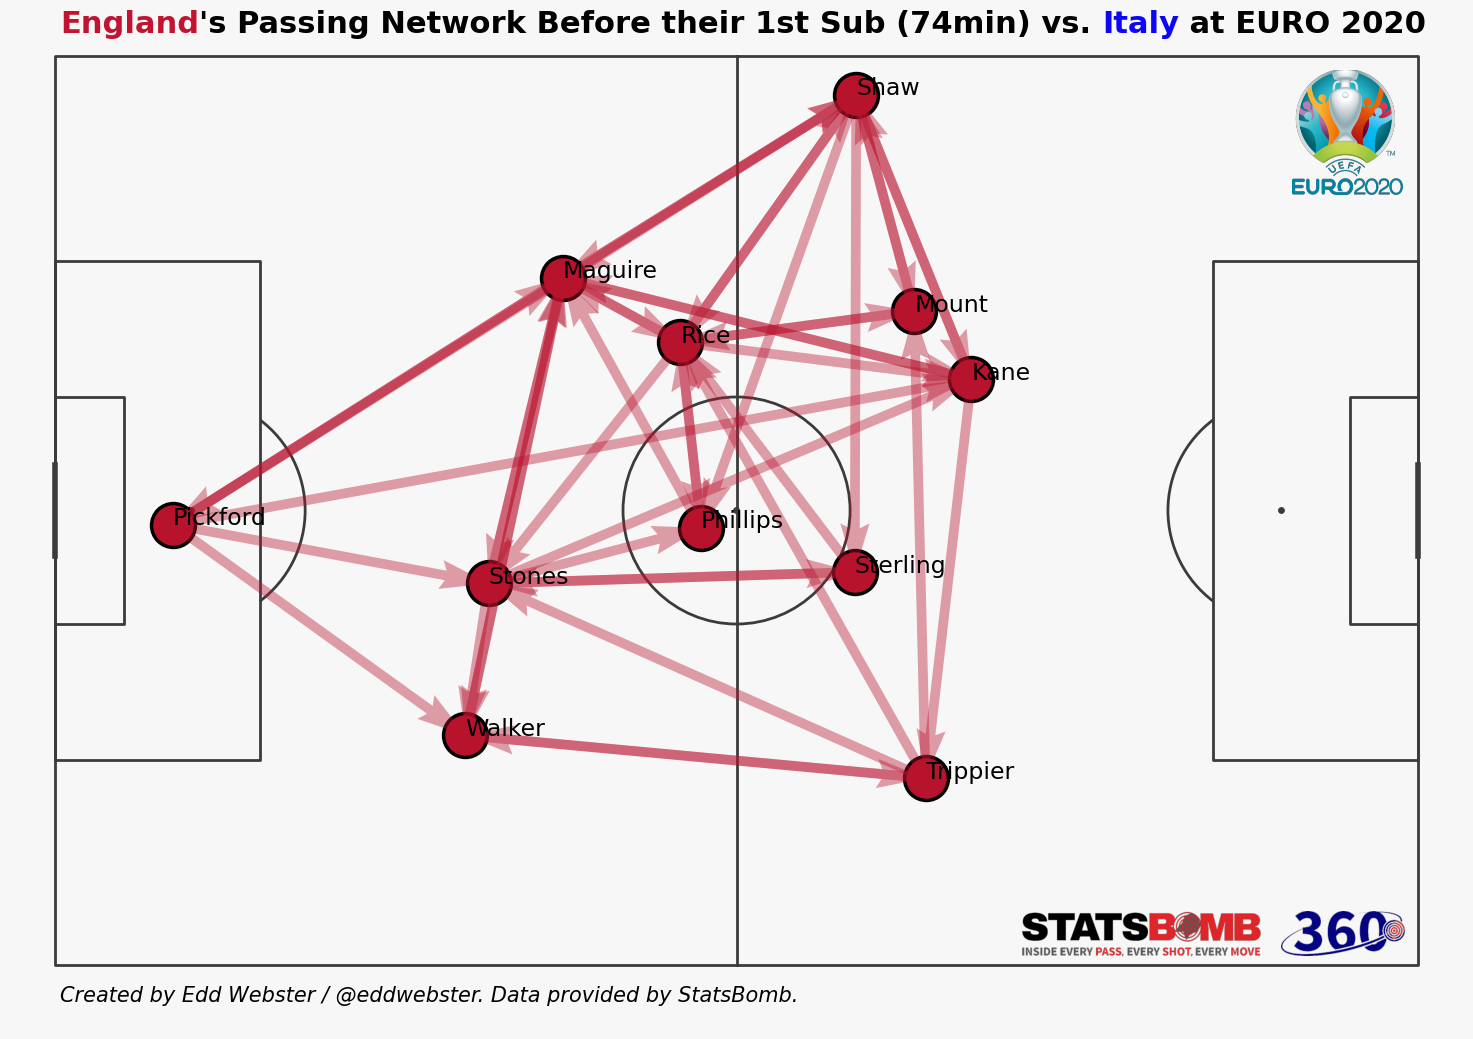

In [33]:
wviz.create_passing_network(df=df_events,
                            home_team='Italy',
                            away_team='England',
                            passing_network_team='England',
                            opponent='Italy',
                            passing_network_team_colour='#c01430',
                            opponent_colour='#0c05fa',
                            node_colour='#b8132d',
                            arrow_colour='#b8132d',
                            minute_start=3,
                            minute_end=70,
                            pitch_length_x=120,
                            pitch_length_y=80,
                            pass_threshold=2,
                            orientation='horizontal',
                            aspect='fll',
                            players_to_exclude = ['Bukayo Saka', 'Jordan Brian Henderson', 'Jack Grealish', 'Marcus Rashford', 'Jadon Sancho'],
                            title = 'Before their 1st Sub (74min)',
                            subtitle='Group Stage',
                            x_dimensions=16.5,
                            y_dimensions=10.5
                           )

Italy’s midfield three of Verratti, Jorginho and Cristante dominated the ball, preventing England from getting any foot-hold in the match, whose main outlet came from the left-hand-side (see England Passing Network). Italy's controlled 66% of the ball over the 120 minutes. The visualisations below show a comparison of the passes made by Italy's midfield 3 and England's midfield 3 (Rice, Phillips, and Mason Mount).

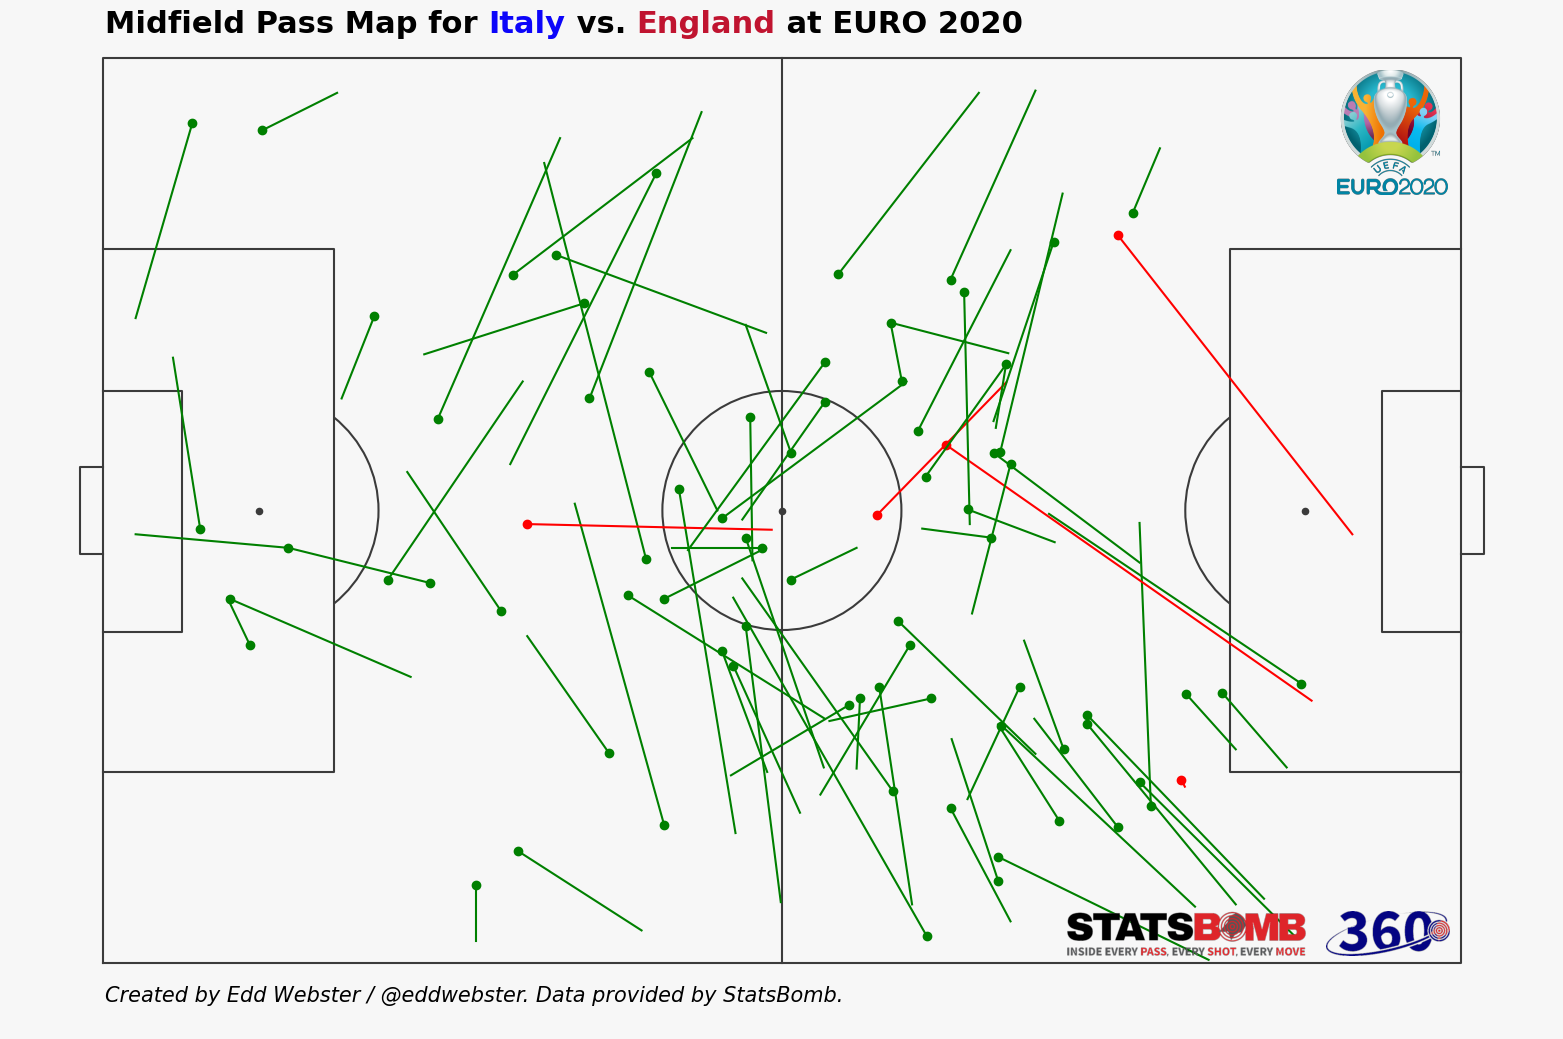

In [34]:
wviz.create_pass_map_multiple_players(df=df_events,
                                      home_team='Italy',
                                      away_team='England',
                                      pass_map_team='Italy',
                                      opponent='England',
                                      player_names=['Jorge Luiz Frello Filho', 'Marco Verratti', 'Bryan Cristante'],
                                      pass_map_team_colour='#0c05fa',
                                      opponent_colour='#c01430',
                                      successful_pass_colour='green',
                                      unsuccessful_pass_colour='red',
                                      pitch_length_x=120,
                                      pitch_length_y=80,
                                      orientation='horizontal', #'vertical'
                                      aspect='fll',
                                      title='Midfield',
                                      x_dimensions=16.5,
                                      y_dimensions=10.5
                                     )

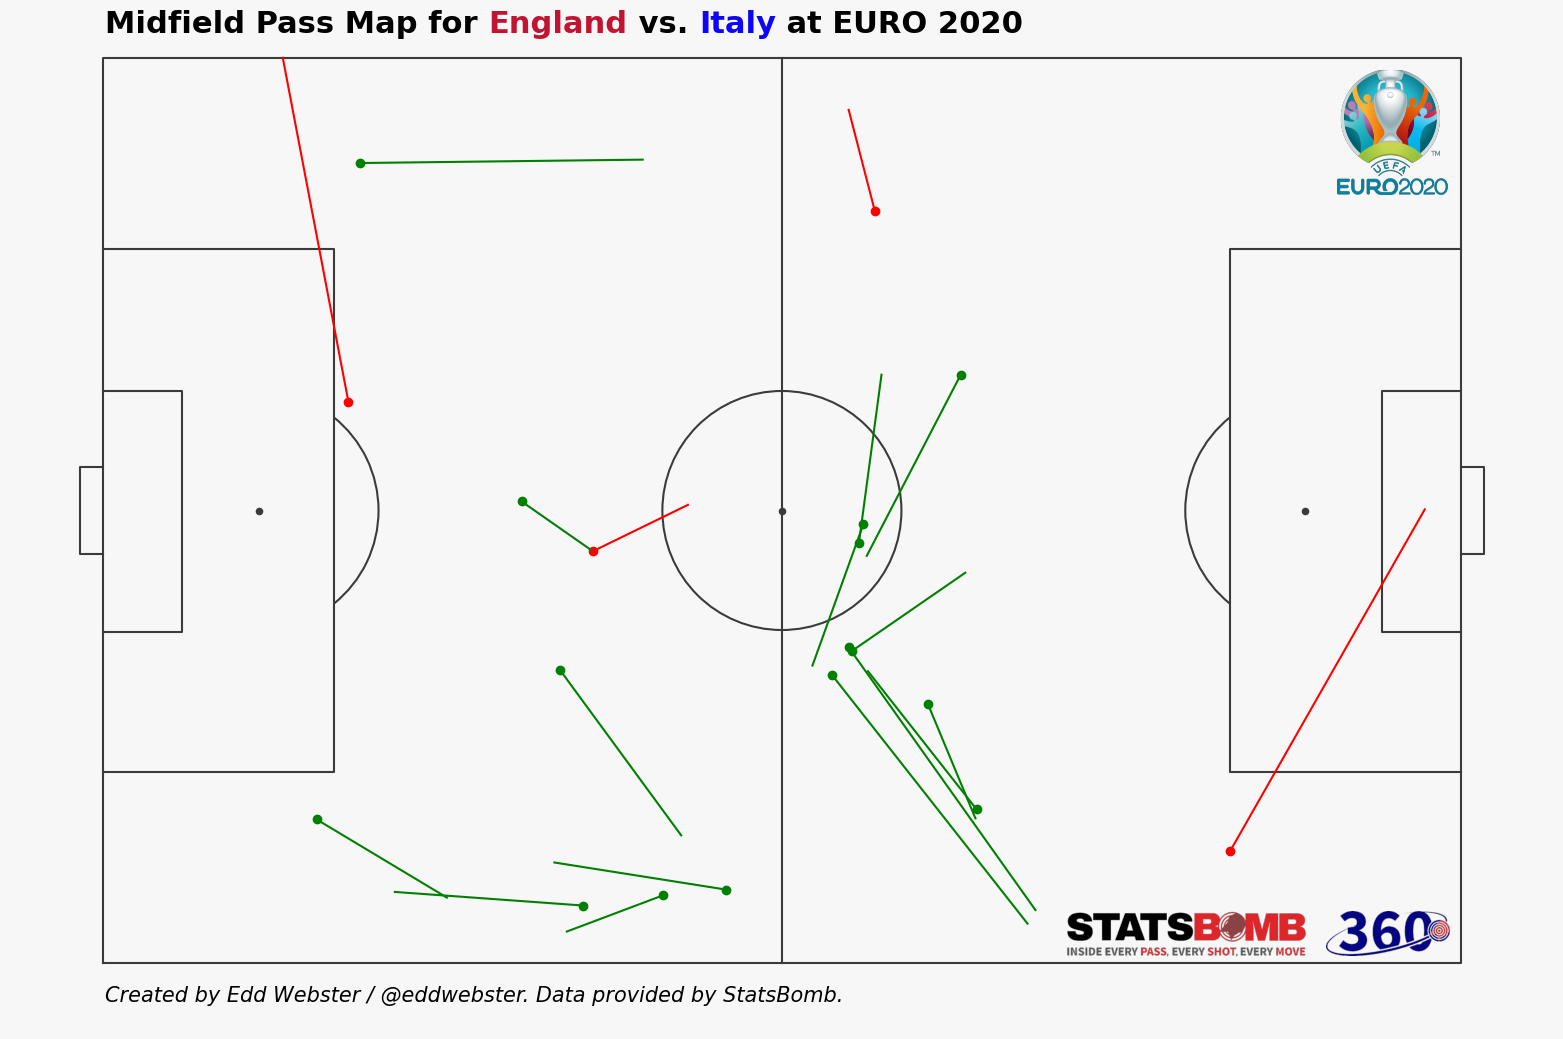

In [35]:
wviz.create_pass_map_multiple_players(df=df_events,
                                      home_team='Italy',
                                      away_team='England',
                                      pass_map_team='England',
                                      opponent='Italy',
                                      player_names=['Declan Rice', 'Kalvin Phillips', 'Mason Mount'],
                                      pass_map_team_colour='#c01430',
                                      opponent_colour='#0c05fa',
                                      successful_pass_colour='green',
                                      unsuccessful_pass_colour='red',
                                      pitch_length_x=120,
                                      pitch_length_y=80,
                                      orientation='horizontal', #'vertical'
                                      aspect='fll',
                                      title='Midfield',
                                      x_dimensions=16.5,
                                      y_dimensions=10.5
                                     )

As had proven so useful for England during the tournament, it was a set-piece that made the difference for Italy. A ball flicked across the box with the resulting header from Verratti was clawed away by Pickford. The subsequent rebound was the highest goalscoring chance of the game (0.899 xG) that Bonucci followed up to score the equaliser.

England were extremely ineffective going forward against Italy, finishing regular time only registering six shots, of which two were on target. Their best quality chance (0.106 xG) since the 2nd minute goal was the result of a Kyle Walker long-throw in the 2nd half of Extra Time (107 min), causing a pinball effect in the box when the Italian were unable to win the first ball. 

The match ended in a penalty shoot-out. England have been in 10 penalty shootouts at major international tournaments, losing seven and winning three. Despite Pickford saving two penalties, England lost to the Italian 3-2. Italy were crowned the champions of EURO 2020 and football did not come home, instead it went to Rome.

In [36]:
Video(video_dir + '/bonucci_its_coming_to_rome.mp4', width=550, height=530)

<a id='section4.6'></a>

### <a id='#section4.6'>4.6. Conclusions</a>
So, did England deserve to win the Euros? My assessment has been split into both their offensive and defensive displays.

##### Offence
Going forward and in terms of goal-scoring chances, the answer is probably, no. In the Final, Italy’s cumulative xG of 2.07 xG verses England 0.42 xG suggests that the Italians can probably feel hard-done-by not getting the job done within 90 or 120 minutes. Against Ukraine, England demonstrated their attacking potential going forward, which made for disappointing viewing in the final when England retreated from the 2nd minute onwards. Over the course of the tournament, England had a total xG of 7.77 compared to Italy's 11.09. Italy scored 2 more goals, but engineered nearly 3.5 more Expected Goals.

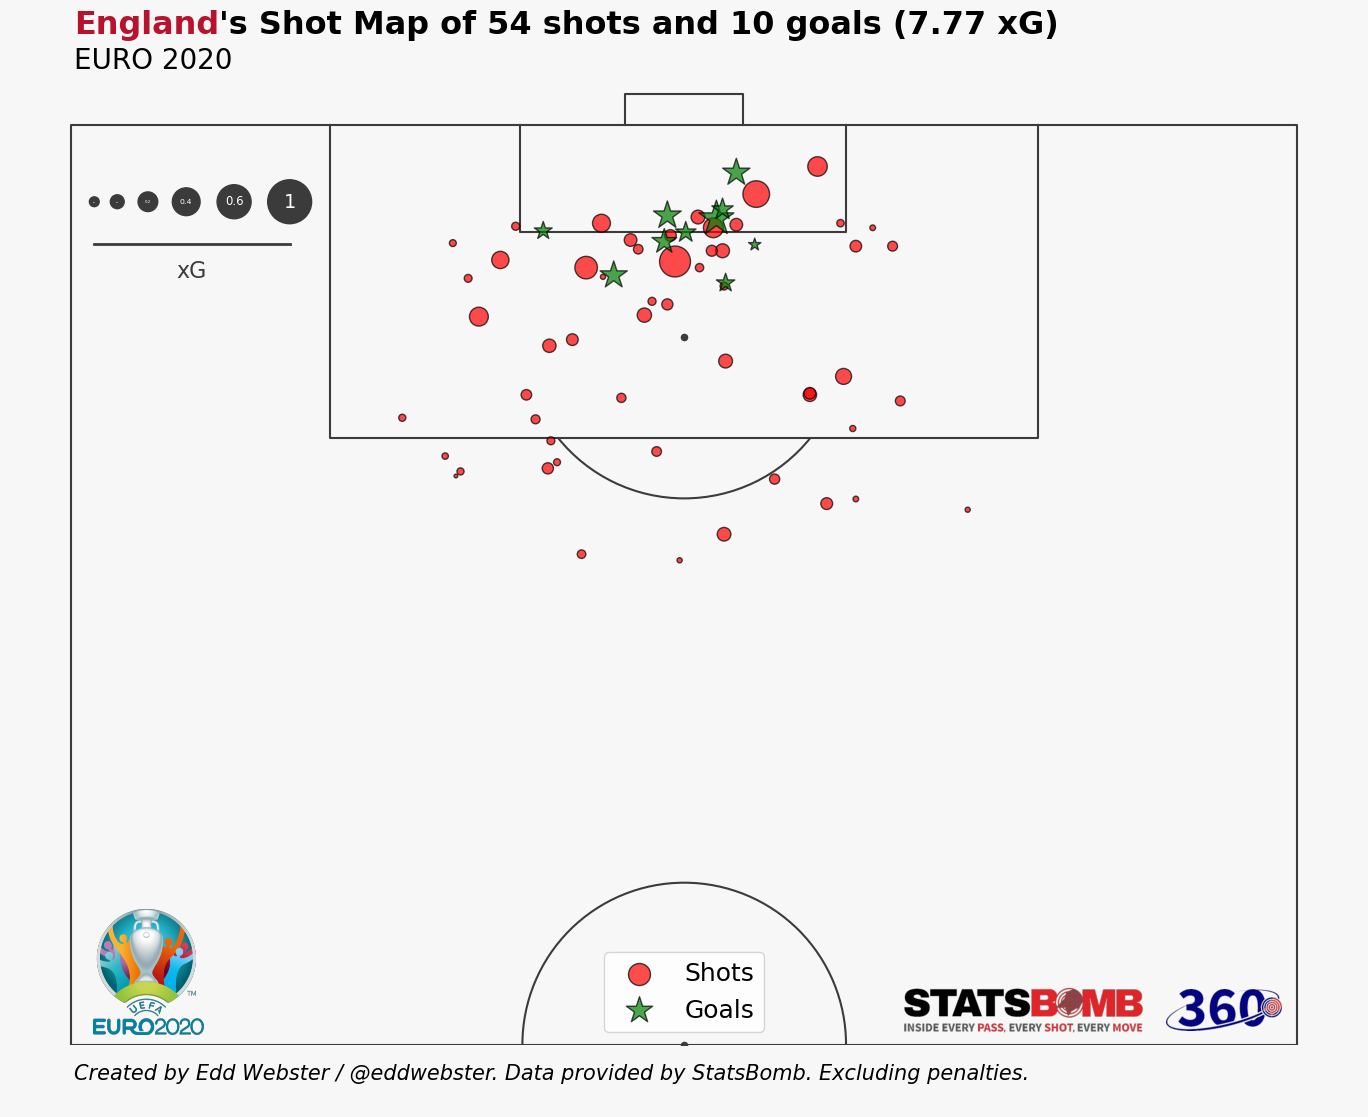

In [37]:
wviz.create_shot_map_team(df=df_events,
                          team_name='England',
                          team_colour='#b8132d',
                          pitch_length_x=120,
                          pitch_length_y=80,
                          orientation='vertical',
                          aspect='half',
                          x_dimensions=16.5,
                          y_dimensions=10.5
                         )

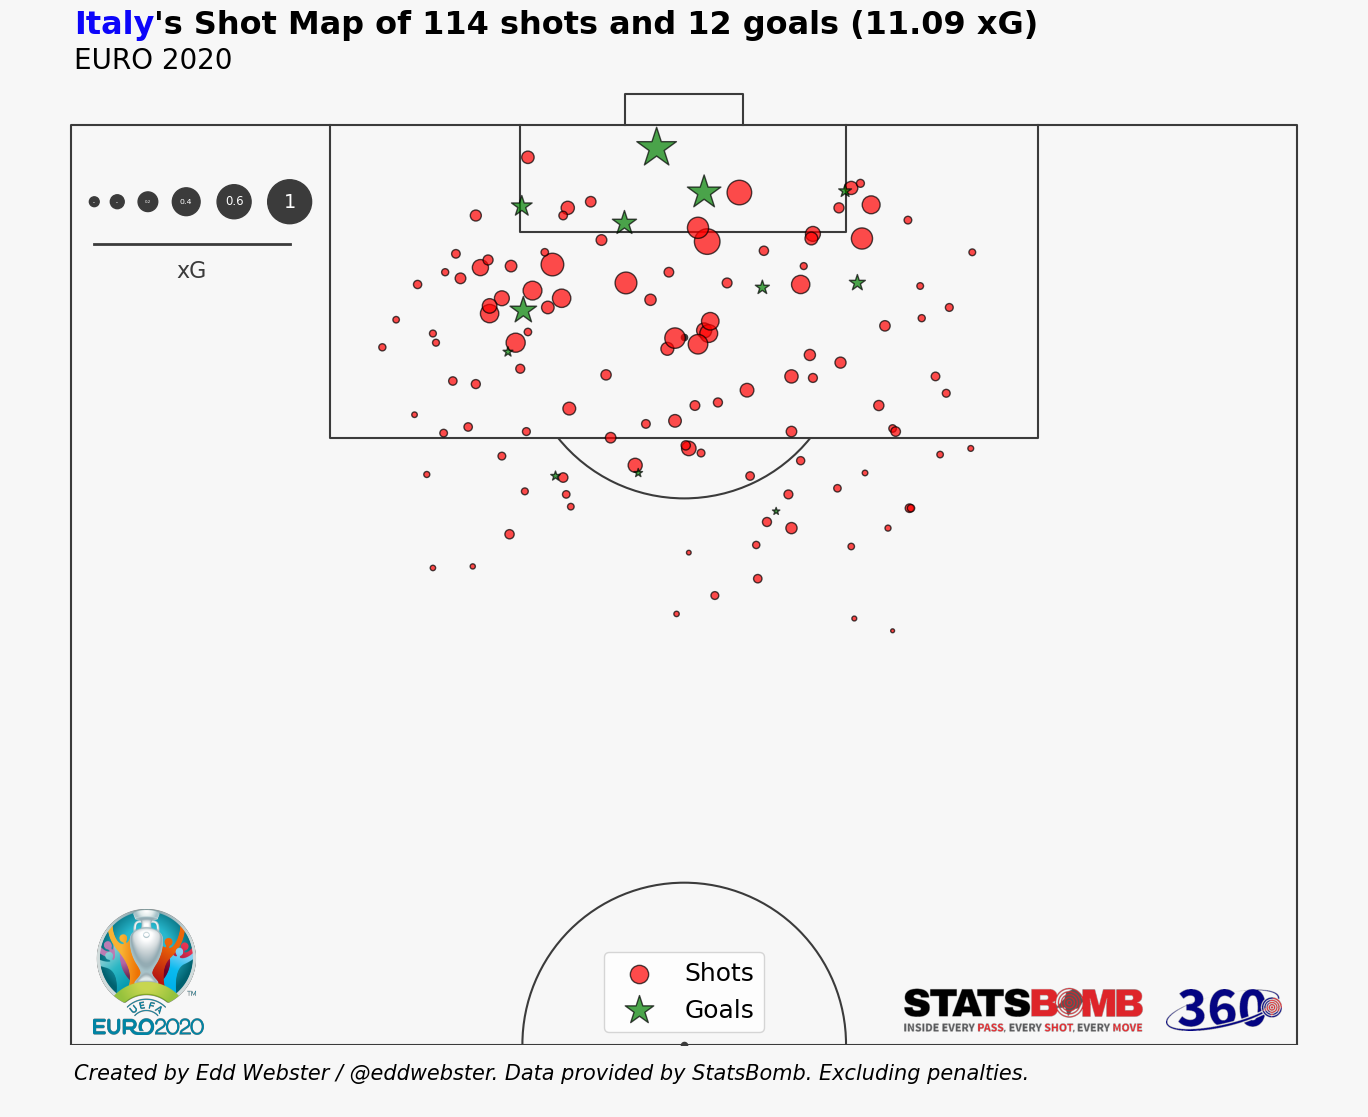

In [38]:
wviz.create_shot_map_team(df=df_events,
                          team_name='Italy',
                          team_colour='#0c05fa',
                          pitch_length_x=120,
                          pitch_length_y=80,
                          orientation='vertical',
                          aspect='half',
                          x_dimensions=16.5,
                          y_dimensions=10.5
                         )

England's lack of creative can also be seen when analysing the tournament for the top OBV creators per 90, with no England player featuring in the top 30, Luke Shaw being England best OBV creator (35th, 0.383 OBV).

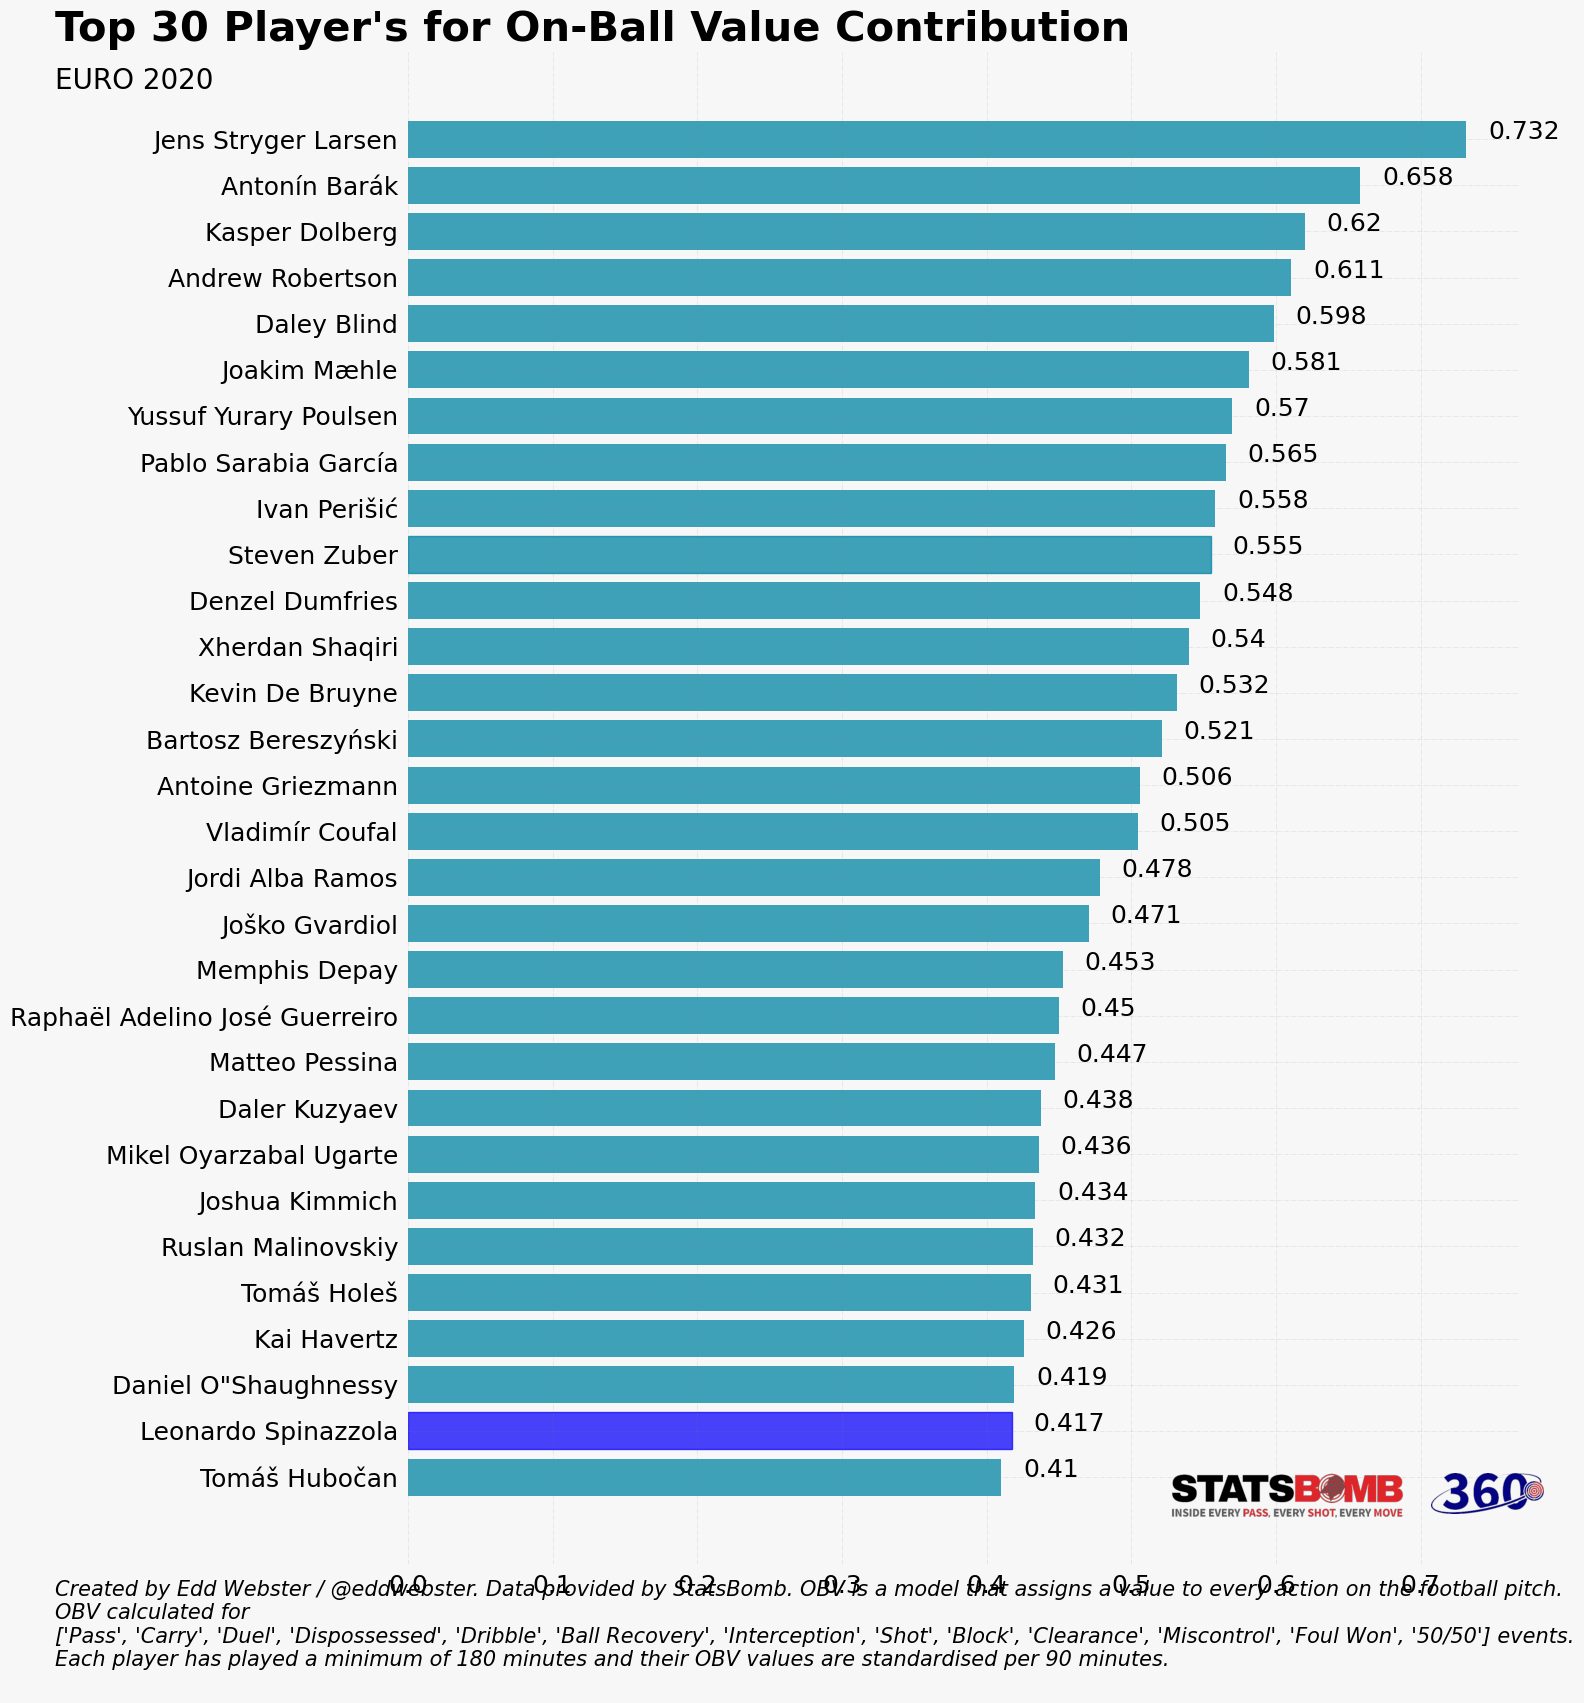

In [39]:
wviz.create_obv_players_bar_chart(df=df_events,
                                  lst_actions=[
                                               'Pass',
                                               'Carry',
                                               'Duel',
                                               'Dispossessed',
                                               'Dribble',
                                               'Ball Recovery',
                                               'Interception',
                                               'Shot',
                                              #'Goal Keeper',
                                               'Block',
                                               'Clearance',
                                               'Miscontrol',
                                               'Foul Won',
                                               '50/50'
                                              ],
                                  count_players=30,
                                  bar_colour='#0184a3',
                                  mins_limit=180,
                                  selected_player_1=28,
                                  selected_player_1_colour='#0c05fa',
                                  selected_player_2=9,
                                  selected_player_2_colour='#0184a3',   # No England player features in the top 30
                                  x_dimensions=16.5,
                                  y_dimensions=10.5
                                 )

##### Defence 
However, over the course of the tournament, England were an incredibly well-drilled team, conceding just two goals and a combined 5.50 xG over seven matches, the third best team defensively the Italians themselves and France (who played 4 matches) when considering xG conceded per 90.

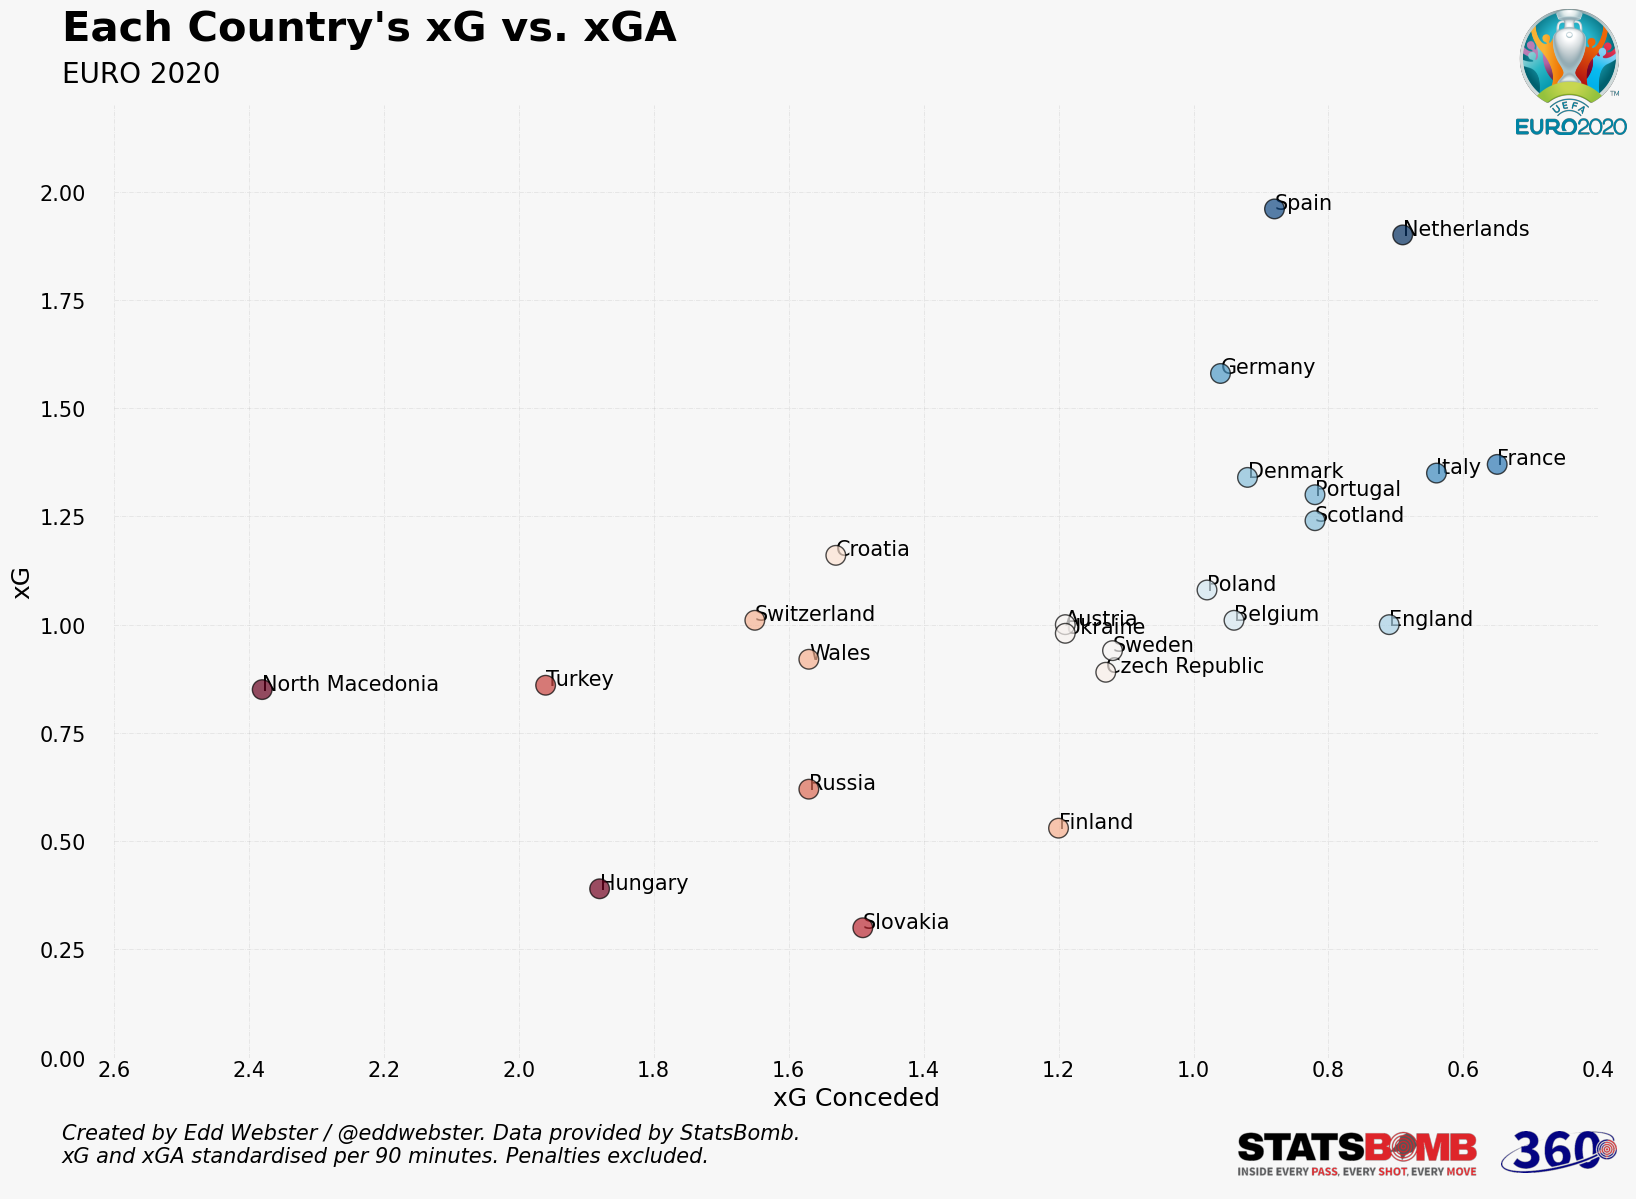

In [40]:
wviz.create_xg_diff_scatter_plot(df=df_events,
                                 colour_scale='RdBu',
                                 x_dimensions=16.5,
                                 y_dimensions=10.5
                                )

England did have their moments of luck, weathering a tricky match against Germany, who created more chances than England but lacked the Three Lion’s defensive stability. However, in the final, England’s luck ran out over the course of the competition, the data analysed would suggest that Italy were worthy winners, due to both their offensive and defensive performances.

---

<a id='section5'></a>

## <a id='#section5'>5. Summary</a>
This notebook visualises and analyses engineered [StatsBomb](https://statsbomb.com/) Event and OBV data from the [Open Data GitHub repository](https://github.com/statsbomb/open-data), using [pandas](http://pandas.pydata.org/) and [matplotlib](https://matplotlib.org/) for visualisation, using the custom [`WebsterViz`](https://github.com/eddwebster/statsbomb/blob/main/scripts/WebsterViz.py) visualisation script, created for this analysis

---

<a id='section6'></a>

## <a id='#section6'>6. References</a>

##### Data
*    [StatsBomb](https://statsbomb.com/)
*    [StatsBomb open data](https://github.com/statsbomb/open-data/tree/master/data): A respository with StatsBomb open data.
*    [StatsBombPy](https://github.com/statsbomb/statsbombpy) | [StatsBombR](https://github.com/statsbomb/StatsBombR): Libraries to facilitate fetching StatsBomb data.
*    [Open Data Documentation](https://github.com/statsbomb/open-data/tree/master/doc):
     +    [Open Data Competitions v2.0.0](https://github.com/statsbomb/open-data/blob/master/doc/Open%20Data%20Competitions%20v2.0.0.pdf).pdf describes the JSON format of the competitions.json file in the data.
     +    [Open Data Events v4.0.0](https://github.com/statsbomb/open-data/blob/master/doc/Open%20Data%20Events%20v4.0.0.pdf).pdf describes the format of the event JSON files in the data/events/ directory.
     +    [Open Data Lineups v2.0.0](https://github.com/statsbomb/open-data/blob/master/doc/Open%20Data%20Lineups%20v2.0.0.pdf).pdf describes the format of the lineup JSON files in the data/lineups/ folder.
     +    [Open Data Matches v3.0.0](https://github.com/statsbomb/open-data/blob/master/doc/Open%20Data%20Matches%20v3.0.0.pdf).pdf describes the format of the match listing JSON files in the data/matches/ folder.
     +    [Open Data 360 Frames v1.0.0.pdf](https://github.com/statsbomb/open-data/blob/master/doc/Open%20Data%20360%20Frames%20v1.0.0.pdf) document describes the JSON format for StatsBomb’s open 360 data.
     +    [StatsBomb Open Data Specification v1.1](https://github.com/statsbomb/open-data/blob/master/doc/StatsBomb%20Open%20Data%20Specification%20v1.1.pdf).pdf gives detail about the meaning an attributes of specific events in the data.

##### Video
*    Match Highlights:
     +    [England 1-0 Croatia (13/06/2021)](https://www.youtube.com/watch?v=TXtiww4KFw8)
     +    [England 0-0 Scotland (18/06/2021)](https://www.youtube.com/watch?v=Sc-JzUfUfHk)
     +    [Czech Republic 0-1 England (22/06/2021)](https://www.youtube.com/watch?v=JTMAWjECLf4)
     +    [England 2-0 Germany (29/06/2021)](https://www.youtube.com/watch?v=RnZBO0YCrYw)
     +    [Ukraine 0-4 England (03/07/2021)](https://www.youtube.com/watch?v=7g6qgbeKUgc)
     +    [England 1-1 Denmark (2-1 AET) (07/07/2021)](https://www.youtube.com/watch?v=2LiEVZ4tObY)
     +    [Italy 1-1 England (3-2 on pens) (11/07/2021)](https://www.youtube.com/watch?v=g-kwLolv--w)
*    [Does Defence Actually Win Titles?](https://www.youtube.com/watch?v=wBrkUX7RJ44) by [Tifo Football](https://www.youtube.com/channel/UCGYYNGmyhZ_kwBF_lqqXdAQ)
     
##### Action Value Frameworks
*    [Introducing On-Ball Value (OBV)](https://statsbomb.com/2021/09/introducing-on-ball-value-obv/)

##### Visualisation
*    [How to Draw a Football Pitch](http://petermckeever.com/2020/10/how-to-draw-a-football-pitch/) by Peter McKeever
*    [How To Create xG Flow Charts in Python](https://www.youtube.com/watch?v=bvoOOYMQkac) by [McKay Johns](https://twitter.com/mckayjohns). For code, see [[link](https://github.com/mckayjohns/Viz-Templates)]

---

***Visit my website [eddwebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my Twitter handle is [@eddwebster](http://www.twitter.com/eddwebster) and my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)